# PR0JECT - COFFEE QUALITY ANALYSIS

## AIM OF THE PROJECT:
>The aim of this project is to perform an in-depth exploration, cleaning, and analysis of the Coffee Quality Database to extract valuable insights related to coffee production and quality. The primary objectives are to clean the data by handling missing values and inconsistencies, then conduct exploratory data analysis (EDA) through univariate, bivariate, and multivariate techniques. Visualizations will be created to illustrate the distribution, relationships, and patterns in the dataset.



## Four major parts of this project : 
>1. Data understanding
>2. Data cleaning 
>3. Data Analysis 
>4. Derived Metrics

## DATA UNDERSTANDING
## Import required libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [152]:
df_coffee = pd.read_csv("CoffeeQuality.csv")

In [153]:
type(df_coffee)

pandas.core.frame.DataFrame

In [154]:
df_coffee.head(3)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [155]:
df_coffee.tail(3)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1338,1338,Robusta,cafe politico,Vietnam,NaN,NaN,NaN,NaN,cafe politico,NaN,...,NaN,9,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Basic information about the dataset

In [156]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1338 non-null   float64
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

### Shape and Size


In [157]:
# Rows and Columns

print(f"The shape of the dataset - {df_coffee.shape}")

The shape of the dataset - (1339, 44)


In [158]:
# Size = Rows * Columns
print(f"The size of the dataset - {df_coffee.size}")

The size of the dataset - 58916


### Data types of the columns

In [159]:
df_coffee.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags           float64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

## Data Preprocessing / Data Cleaning

#### Check for duplicates

In [160]:
# duplicated() - used to identify duplicates in the dataset
# sum() - calculate the total of the values

df_coffee.duplicated().sum()

0

* There are no duplicates.

#### Handling missing values

In [161]:
# isnull() - used to identify the missing values
# sum() - calculate the total of the missing values in each columns
# sum() - to calculate the total number of missing values across all columns

df_coffee.isnull().sum().sum()

4045

* A total of 4045 missing values are present, and their handling is explained in the following steps.

In [162]:
# isnull() - used to identify the missing values
# sum() - calculate the total of the missing values in each columns

df_coffee.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                159
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              1
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

#### Remove the unnecessary columns before dealing with the missing values

In [163]:
# 'Unnamed: 0' - an index number already exists
# 'Lot.Number' - the missing values account for more than 75% (79.3%), which could impact the analysis
# ICO - International Coffee Organization 
# 'ICO.Number' - There are 845 unique values, but it does not contribute to the analysis, so it can be removed
# 'Altitude' - The column is of object type, and we can use 'altitude_mean_meters' instead

df_coffee.drop(['Unnamed: 0','Lot.Number','ICO.Number','Altitude'],axis=1,inplace=True)

In [164]:
df_coffee.groupby('Certification.Body')[['Certification.Address','Certification.Contact']].value_counts().head(4)

Certification.Body              Certification.Address                     Certification.Contact                   
AMECAFE                         59e396ad6e22a1c22b248f958e1da2bd8af85272  0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7    204
                                3e18a5ae6f5e2aabca37e025f94e1974558bf5f0  e3212d17882b7657b3fba559b4072e552604d5d1      1
Africa Fine Coffee Association  073285c0d45e2f5539012d969937e529564fa6fe  c4ab13415cdd69376a93780c0166e7b1a10481ea     48
                                78a435a6973d56b40414c7ae75a8b43e443e6e27  c4ab13415cdd69376a93780c0166e7b1a10481ea      1
Name: count, dtype: int64

In [165]:
# 'Certification.Address' and 'Certification.Contact' columns are in an encoded format,
# so considered only the 'Certification Body' column and removed 'Certification.Address' and 'Certification.Contact'

df_coffee.drop(['Certification.Address','Certification.Contact'],axis=1,inplace=True)

In [166]:
# 'altitude_low_meters' and 'altitude_high_meters' is dropped
# instead of this altitude_mean_meters can be used for analysis

df_coffee.drop(['altitude_low_meters','altitude_high_meters'],axis=1,inplace=True)

In [167]:
df_coffee['unit_of_measurement'].value_counts()

unit_of_measurement
m     1157
ft     182
Name: count, dtype: int64

* The 'unit_of_measurement' is in meters and feet and the mode is meters(m), so convert the feet into meters.

                        Meters = Feet × 0.3048

In [168]:
# filtering the 'ft' in 'unit_of_measurement' and their respective 'altitude_mean_meters'
# converting the filtered feet values into meters (ie) multiplying the filtered value with 0.3048

df_coffee.loc[df_coffee['unit_of_measurement'] == 'ft', 'altitude_mean_meters'] = df_coffee.loc[df_coffee['unit_of_measurement'] == 'ft', 'altitude_mean_meters'] * 0.3048

In [169]:
# chaniging the feet(ft) value in the 'unit_of_measurement' columns into meters(m)

df_coffee.loc[df_coffee['unit_of_measurement'] == 'ft', 'unit_of_measurement'] = 'm'

In [170]:
# Verifying value_counts() to ensure all ft values are converted to m.

df_coffee['unit_of_measurement'].value_counts()

unit_of_measurement
m    1339
Name: count, dtype: int64

* Remove the unit of measurement column and specify that the altitude values are in meters in altitude column.

In [171]:
# removing 'unit_of_measurement' column

df_coffee.drop('unit_of_measurement', axis = 1, inplace = True)

In [172]:
df_coffee.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Mill', 'Company',
       'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight',
       'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1',
       'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'Expiration',
       'Certification.Body', 'altitude_mean_meters'],
      dtype='object')

In [173]:
# remove non-alphabetic characters and spaces, and convert to uppercase

owner = df_coffee['Owner'].str.replace(r'[^A-Za-z0-9]', '', regex=True).str.upper()
owner1 = df_coffee['Owner.1'].str.replace(r'[^A-Za-z0-9]', '', regex=True).str.upper()

# Compare the values in 'Owner' and 'Owner.1' columns and find the unequal rows, excluding NaN

unequal = (owner != owner1) & owner.notna() & owner1.notna()

# Extract the rows where the values are unequal

unequal_owners = df_coffee[unequal][['Owner', 'Owner.1']]
unequal_owners

,Owner,Owner.1
392,federacion nacional de cafeteros,Federación Nacional de Cafeteros


In [174]:
df_coffee.loc[392,['Owner','Owner.1']] = 'federacion nacional de cafeteros'

In [175]:
# repeated the same step to check whether 'Owner' and 'Owner.1' columns doesn't have any unequal values

owner = df_coffee['Owner'].str.replace(r'[^A-Za-z0-9]', '', regex=True).str.upper()
owner1 = df_coffee['Owner.1'].str.replace(r'[^A-Za-z0-9]', '', regex=True).str.upper()
unequal = (owner != owner1) & owner.notna() & owner1.notna()
unequal_owners = df_coffee[unequal][['Owner', 'Owner.1']]
print(unequal_owners)

Empty DataFrame
Columns: [Owner, Owner.1]
Index: []


In [176]:
# check if all values are equal after the changes
# if the unequal_owners dataframe is empty, it means all values are equal

if unequal_owners.empty:  
    print('All values are equal')
else:
    print('All values are not equal')

All values are equal


In [177]:
# have enough evidence that the two colunms have same values, so ['Owner.1'] is removed

df_coffee.drop('Owner.1', axis=1, inplace=True)

###  Removed unnecessary columns for easier data analysis

####  Renaming the columns

In [178]:
# renamed columns for clarity and convenience


df_coffee.rename(columns={'Country.of.Origin':'Origin_Country','Farm.Name':'Farm_Name','Number.of.Bags':'Number_of_Bags','Bag.Weight':'Bag_Weight_kg',
                          'In.Country.Partner':'In_Country_Partner','Harvest.Year':'Harvest_Year','Grading.Date':'Grading_Date',
                          'Processing.Method':'Processing_Method','Clean.Cup':'Clean_Cup','Cupper.Points':'Cupper_Points',
                          'Total.Cup.Points':'Total_Cup_Points','Category.One.Defects':'Category1_Defects','Category.Two.Defects':'Category2_Defects',
                          'Certification.Body':'Certification','altitude_mean_meters':'Altitude(Meters)'},inplace=True)

In [179]:
df_coffee.columns

Index(['Species', 'Owner', 'Origin_Country', 'Farm_Name', 'Mill', 'Company',
       'Region', 'Producer', 'Number_of_Bags', 'Bag_Weight_kg',
       'In_Country_Partner', 'Harvest_Year', 'Grading_Date', 'Variety',
       'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points',
       'Total_Cup_Points', 'Moisture', 'Category1_Defects', 'Quakers', 'Color',
       'Category2_Defects', 'Expiration', 'Certification', 'Altitude(Meters)'],
      dtype='object')

### Handling missing values

In [180]:
df_coffee.isnull().sum().sum()

2130

In [181]:
# total of missing values in each columns

df_coffee.isnull().sum()

Species                 0
Owner                   7
Origin_Country          1
Farm_Name             359
Mill                  318
Company               209
Region                 59
Producer              232
Number_of_Bags          1
Bag_Weight_kg           0
In_Country_Partner      0
Harvest_Year           47
Grading_Date            0
Variety               226
Processing_Method     170
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean_Cup               0
Sweetness               0
Cupper_Points           0
Total_Cup_Points        0
Moisture                0
Category1_Defects       0
Quakers                 1
Color                 270
Category2_Defects       0
Expiration              0
Certification           0
Altitude(Meters)      230
dtype: int64

In [182]:
# sum of missing values in 'Owner' column

df_coffee['Owner'].isnull().sum()

7

In [183]:
# filtering the missing values

df_coffee[df_coffee['Owner'].isna()]

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
364,Arabica,NaN,Honduras,los hicaques,cigrah sps,cigrah,comayagua,Reynerio Zepeda,275.0,1 kg,...,7.83,83.50,0.10,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,1350.0
459,Arabica,NaN,Honduras,los hicaques,cigrah sps,cigrah,comayagua,Reynerio Zepeda,275.0,1 kg,...,7.50,83.17,0.11,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,1350.0
602,Arabica,NaN,Colombia,supply chain ecom cca s.a.,south huila,ecom cca s.a.,south huila,Supply Chain ECOM CCA S.A.,250.0,70 kg,...,7.50,82.75,0.00,0,0.0,Blue-Green,0,"April 11th, 2013",Almacafé,1625.0
848,Arabica,NaN,Honduras,gran manzana y el aguacate,cigrah sps,cigrah,comayagua,"Tomás Sosa, Juan Damaso",275.0,1 kg,...,7.50,81.83,0.10,0,0.0,Green,4,"May 16th, 2015",Instituto Hondureño del Café,1350.0
882,Arabica,NaN,Honduras,gran manzana y el aguacate,cigrah sps,cigrah,comayagua,"Tomás Sosa, Juan Damaso",275.0,1 kg,...,7.50,81.67,0.10,0,0.0,Green,5,"May 16th, 2015",Instituto Hondureño del Café,1400.0
975,Arabica,NaN,Honduras,los hicaques,cigrah,cigrah,central region,Reinerio Zepeda,275.0,1 kg,...,7.33,81.17,0.13,0,0.0,Green,1,"March 10th, 2016",Instituto Hondureño del Café,1450.0
1044,Arabica,NaN,Honduras,los hicaques,cigrah,cigrah,central region,Reinerio Zepeda,275.0,1 kg,...,7.00,80.75,0.13,0,0.0,Green,1,"March 10th, 2016",Instituto Hondureño del Café,1450.0


In [184]:
# filtered by 'Farm_Name' as each farm shares the same owner

df_coffee[df_coffee['Farm_Name']=='los hicaques'].head()

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
28,Arabica,bismarck castro,Honduras,los hicaques,cigrah s.a de c.v.,cigrah s.a de c.v,comayagua,Reinerio Zepeda,275.0,69 kg,...,8.25,86.67,0.10,0,0.0,Green,3,"May 18th, 2018",Instituto Hondureño del Café,1400.0
182,Arabica,bismarck castro,Honduras,los hicaques,dry mill,cigrah s.a de c.v,central region,Reinerio Zepeda,275.0,69 kg,...,7.83,84.33,0.11,0,1.0,Green,2,"April 4th, 2017",Instituto Hondureño del Café,1500.0
316,Arabica,bismarck castro,Honduras,los hicaques,cigrah s.a de c.v.,cigrah s.a de c.v,comayagua,Reinerio Zepeda,285.0,69 kg,...,7.33,83.67,0.10,0,0.0,Green,2,"May 11th, 2018",Instituto Hondureño del Café,1400.0
364,Arabica,NaN,Honduras,los hicaques,cigrah sps,cigrah,comayagua,Reynerio Zepeda,275.0,1 kg,...,7.83,83.50,0.10,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,1350.0
459,Arabica,NaN,Honduras,los hicaques,cigrah sps,cigrah,comayagua,Reynerio Zepeda,275.0,1 kg,...,7.50,83.17,0.11,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,1350.0


In [185]:
# for the 'Farm_Name' 'Los Hicaques' the owner will be so storing it in los_hicaques_owner

los_hicaques_owner = df_coffee[df_coffee['Farm_Name'] == 'los hicaques']['Owner'].dropna().iloc[0]
los_hicaques_owner

'bismarck castro'

In [186]:
# .loc - the location where 'Farm_name' is 'Los Hicaques' and ['Owner'] value is null will be filtered
# the filtered value is replaced with los_hicaques_owner


df_coffee.loc[
    (df_coffee['Farm_Name'] == 'los hicaques') & (df_coffee['Owner'].isna()), 
    'Owner'
] = los_hicaques_owner

In [187]:
# here there are two farms in this name but the 'Owner' name is null value

df_coffee[df_coffee['Farm_Name']=='gran manzana y el aguacate']

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
848,Arabica,NaN,Honduras,gran manzana y el aguacate,cigrah sps,cigrah,comayagua,"Tomás Sosa, Juan Damaso",275.0,1 kg,...,7.5,81.83,0.1,0,0.0,Green,4,"May 16th, 2015",Instituto Hondureño del Café,1350.0
882,Arabica,NaN,Honduras,gran manzana y el aguacate,cigrah sps,cigrah,comayagua,"Tomás Sosa, Juan Damaso",275.0,1 kg,...,7.5,81.67,0.1,0,0.0,Green,5,"May 16th, 2015",Instituto Hondureño del Café,1400.0


In [188]:
# here there is one farm in this name but the 'Owner' name is null value

df_coffee[df_coffee['Farm_Name']=='supply chain ecom cca s.a.']

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
602,Arabica,NaN,Colombia,supply chain ecom cca s.a.,south huila,ecom cca s.a.,south huila,Supply Chain ECOM CCA S.A.,250.0,70 kg,...,7.5,82.75,0.0,0,0.0,Blue-Green,0,"April 11th, 2013",Almacafé,1625.0


In [189]:
# so these three missing values can be replaced with specific values

df_coffee['Owner'] = df_coffee['Owner'].fillna('Unknown')

In [190]:
# to check whether the missing value of 'Owner' is filled
df_coffee['Owner'].isnull().sum()

0

In [191]:
# sum of missing values in 'Origin_Country'

df_coffee['Origin_Country'].isnull().sum()

1

In [192]:
# fitering the missing value in 'Origin_Country'

df_coffee[df_coffee['Origin_Country'].isna()]

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,NaN,NaN,149.0,70 kg,...,7.25,79.08,0.1,0,0.0,NaN,3,"February 29th, 2012",Almacafé,NaN


In [193]:
# filtering the 'Owner' respective to the missing value
# selects the 'Origin_Country' of the filtered data and take value counts

df_coffee[df_coffee['Owner']=='racafe & cia s.c.a']['Origin_Country'].value_counts()

Origin_Country
Colombia    59
Name: count, dtype: int64

In [194]:
# calculate mode for the filtered data for replacing it in the dmissing values'

oc_mv_mode = df_coffee[df_coffee['Owner']=='racafe & cia s.c.a']['Origin_Country'].mode()[0]
oc_mv_mode

'Colombia'

In [195]:
# the mode is replaced in the missing value

df_coffee['Origin_Country'] = df_coffee['Origin_Country'].fillna(oc_mv_mode)

In [196]:
# to check whether the missing value of 'Origin_Country' is filled

df_coffee['Origin_Country'].isnull().sum()

0

In [197]:
print(f"Farm_Name missing values : {df_coffee['Farm_Name'].isnull().sum()}")
print(f"Mill missing values : {df_coffee['Mill'].isnull().sum()}")
print(f"Company missing values : {df_coffee['Company'].isnull().sum()}")
print(f"Region missing values : {df_coffee['Region'].isnull().sum()}")
print(f"Producer missing values : {df_coffee['Producer'].isnull().sum()}")

Farm_Name missing values : 359
Mill missing values : 318
Company missing values : 209
Region missing values : 59
Producer missing values : 232


In [198]:
# ['Farm_Name','Mill','Company','Region','Producer'] these are unique values
# except for region other 4 mode count is less than than the missing values
# so here the missing values are replaced with specific values

columns_to_fill = ['Farm_Name','Mill','Company','Region','Producer']
df_coffee[columns_to_fill] = df_coffee[columns_to_fill].fillna('Unknown')

In [199]:
# to check whether the missing value of columns_to_fill are filled

df_coffee[columns_to_fill].isnull().sum()

Farm_Name    0
Mill         0
Company      0
Region       0
Producer     0
dtype: int64

In [200]:
# sum of missing values in 'Number_of_Bags

df_coffee['Number_of_Bags'].isnull().sum()

1

In [201]:
# filtering the missing value

df_coffee[df_coffee['Number_of_Bags'].isna()]

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,c.p.w.e,Unknown,oromia,Bazen Agricultural & Industrial Dev't Plc,NaN,60 kg,...,9.0,88.67,0.03,0,0.0,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,1635.0


In [202]:
# filtering the 'Owmner' respective to the 'Number_of_Bags' missing value

bags_mv_owner_filter = df_coffee[df_coffee['Owner']=='ethiopia commodity exchange']
bags_mv_owner_filter.head(3)

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,c.p.w.e,Unknown,oromia,Bazen Agricultural & Industrial Dev't Plc,NaN,60 kg,...,9.00,88.67,0.03,0,0.0,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,1635.0
8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,c.p.w.e,Unknown,oromiya,Bazen Agricultural & Industrial Dev't Plc,300.0,60 kg,...,8.67,88.42,0.03,0,0.0,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,1635.0
14,Arabica,ethiopia commodity exchange,Ethiopia,aolme,c.p.w.e,Unknown,oromiya,Bazen Agricultural & Industrial Dev't Plc,300.0,60 kg,...,8.50,87.83,0.05,0,0.0,NaN,2,"August 31st, 2011",Ethiopia Commodity Exchange,1635.0


In [203]:
# finding the mean of 'Number_of_Bags' respective to the missing value owner
# reason for round of is because there is no true float value in the column so don't want to disturb it

bags_mv_mean = round(bags_mv_owner_filter['Number_of_Bags'].mean())
bags_mv_mean

296

In [204]:
# filling the missing value with mean value

df_coffee['Number_of_Bags'] = df_coffee['Number_of_Bags'].fillna(bags_mv_mean)

In [205]:
# to check whether the missing value of c'Number_of_Bags' is filled

df_coffee['Number_of_Bags'].isnull().sum()

0

In [206]:
# check for true floats by splitting the value into its fractional and integer parts
df_coffee['fractional_part'], df_coffee['integer_part'] = np.modf(df_coffee['Number_of_Bags'])

# filter rows where the fractional part is not zero
true_floats = df_coffee[df_coffee['fractional_part'] != 0]

# print rows with true float values
print(true_floats['Number_of_Bags'])

# check if there are any true float values
if not true_floats.empty:
    print("There are true float values in the 'Number_of_Bags' column.")
else:
    print("There are no true float values in the 'Number_of_Bags' column.")


Series([], Name: Number_of_Bags, dtype: float64)
There are no true float values in the 'Number_of_Bags' column.


In [207]:
# changed the float data type to int

df_coffee['Number_of_Bags']=df_coffee['Number_of_Bags'].astype(int)

In [208]:
# dropped the extra created column

df_coffee.drop(['fractional_part','integer_part'], axis=1, inplace=True)

In [209]:
# sum of missing values in 'Harvest_Year'

df_coffee['Harvest_Year'].isnull().sum()

47

In [210]:
# the consistency of data is not in the correct format
# convert the data to right format

df_coffee['Harvest_Year'].value_counts()

Harvest_Year
2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
Mar-10                        3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Abril - Julio                 2
Jan-11                        2
2011/2012                     2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011                    

In [211]:
# a funvtion is defined to filter the year 
# using re - regular expression
# re is used for manipulation of strings

def extract_last_year(value):
    import re
    if isinstance(value, str):
        # Remove all non-digit characters
        numeric_value = re.sub(r'[^0-9]', '', value)
        if len(numeric_value) >= 2:  # Ensure at least 4 digits
            return int(numeric_value[-2:])  # Take the last 4 digits
    return np.nan  # Return NaN if no valid year found

# Apply the function to extract the year
df_coffee['Harvest_Year'] = df_coffee['Harvest_Year'].apply(extract_last_year)


df_coffee['Harvest_Year']

0       14.0
1       14.0
2        NaN
3       14.0
4       14.0
        ... 
1334    16.0
1335    16.0
1336    14.0
1337    13.0
1338    13.0
Name: Harvest_Year, Length: 1339, dtype: float64

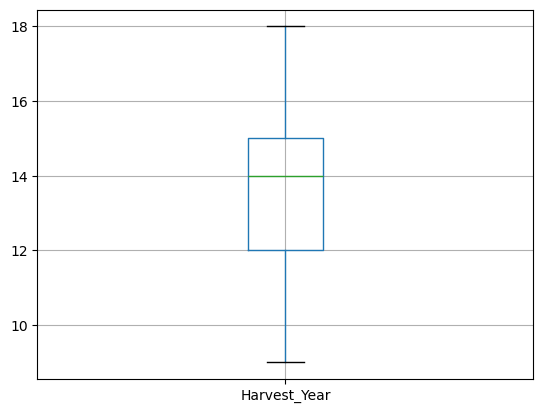

In [212]:
# boxplot to check for outliers

df_coffee.boxplot(column='Harvest_Year')
plt.show()

* No outliers were observed in the 'Harvest_Year' column.
* The box plot indicates a median value of 14.

In [213]:
# Prefix '20' for two-digit numbers and '200' for single-digit numbers

df_coffee['Harvest_Year'] = df_coffee['Harvest_Year'].apply(
    lambda x: f"20{int(x):02}" if pd.notna(x) and len(str(int(x))) == 2 else
              f"200{int(x)}" if pd.notna(x) and (len(str(int(x)))) else 
              np.nan)

df_coffee['Harvest_Year'].head(2)

0    2014
1    2014
Name: Harvest_Year, dtype: object

In [214]:
# sum of missing values in 'Harvest_Year'

df_coffee['Harvest_Year'].isnull().sum()

57

* Have 57 missing values which can be replaced with Grading year.
* Garding date is given extract the year from the column

#### Why garding year?
* Harvest Year represents the year the coffee was harvested, while Grading Year is the year the coffee was graded. Typically, grading occurs close to or after the harvest.
* Using the Grading Year preserves this natural timeline relationship, ensuring your data stays meaningful and consistent.
* So replaced missing values with "Grading_Year" instead of mean or median.

In [215]:
# clean up ordinal suffixes if present
# convert to datetime, handling errors gracefully
# extract the year from 'Grading_Date' using dt.year

# Clean up ordinal suffixes if present
df_coffee['Grading_Date'] = df_coffee['Grading_Date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True).str.strip()

# Convert to datetime, handling errors gracefully
df_coffee['Grading_Date'] = pd.to_datetime(df_coffee['Grading_Date'], errors='coerce')


# Extract the year
df_coffee['Grading_Year'] = df_coffee['Grading_Date'].dt.year

# Display the result
print(df_coffee[['Grading_Date', 'Grading_Year']].head())



  Grading_Date  Grading_Year
0   2015-04-04          2015
1   2015-04-04          2015
2   2010-05-31          2010
3   2015-03-26          2015
4   2015-04-04          2015


In [216]:
# data type of 'Grading_Year'

df_coffee['Grading_Date'].dtype

dtype('<M8[ns]')

In [217]:
df_coffee['Grading_Year'] = df_coffee['Grading_Date'].dt.year

In [218]:
# Fill missing values in 'Harvest_Year' with corresponding values from 'Grading_Year'

df_coffee['Harvest_Year'] = df_coffee['Harvest_Year'].fillna(df_coffee['Grading_Year'])

In [219]:
# changing the data type of 'Harvest_Year' to int

df_coffee['Harvest_Year'] = df_coffee['Harvest_Year'].astype(int)

In [220]:
# to check whether the missing value of 'Harvest_Year' is filled#

df_coffee['Harvest_Year'].isnull().sum()

0

In [221]:
df_coffee.drop('Grading_Year' ,axis=1, inplace = True)

In [222]:
# sum of missing values in 'Variety'

df_coffee['Variety'].isnull().sum()

226

In [223]:
df_coffee['Variety'].value_counts()

Variety
Caturra                  256
Bourbon                  226
Typica                   211
Other                    110
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     6
Peaberry                   5
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Blue Mountain              2
Ethiopian Yirgacheffe      2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Sumatra Lintong            1
Marigojipe                 1
Pache Comun                1
Name: count, dtype: int64

In [224]:
# finding the mode of 'Varity'

variet_mode = df_coffee['Variety'].mode()[0]
variet_mode

'Caturra'

In [225]:
# replacing the missing values using mode

df_coffee['Variety'] = df_coffee['Variety'].fillna(variet_mode)

In [226]:
# to check whether the missing value of 'Variety' is filled

df_coffee['Variety'].isnull().sum()

0

In [227]:
# sum of missing values in 'Processing_Method'

df_coffee['Processing_Method'].isnull().sum()

170

In [228]:
# finding the mode of 'Processing_Method'

process_mode = df_coffee['Processing_Method'].mode()[0]
process_mode

'Washed / Wet'

In [229]:
# replacing the missing values using mode

df_coffee['Processing_Method'] = df_coffee['Processing_Method'].fillna(process_mode)

In [230]:
# to check whether the missing value of 'Processing_Method' is filled

df_coffee['Processing_Method'].isnull().sum()

0

In [231]:
df_coffee.isnull().sum()

Species                 0
Owner                   0
Origin_Country          0
Farm_Name               0
Mill                    0
Company                 0
Region                  0
Producer                0
Number_of_Bags          0
Bag_Weight_kg           0
In_Country_Partner      0
Harvest_Year            0
Grading_Date            0
Variety                 0
Processing_Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean_Cup               0
Sweetness               0
Cupper_Points           0
Total_Cup_Points        0
Moisture                0
Category1_Defects       0
Quakers                 1
Color                 270
Category2_Defects       0
Expiration              0
Certification           0
Altitude(Meters)      230
dtype: int64

In [232]:
# sum of missing values in 'Quakers'
# Quakers - defective coffee beans

df_coffee['Quakers'].isnull().sum()

1

In [233]:
# mode of 'Quakers'

quakers_mode = df_coffee['Quakers'].mode()[0]
quakers_mode

0.0

In [234]:
# filling the missing value with mode

df_coffee['Quakers'] = df_coffee['Quakers'].fillna(quakers_mode)

In [235]:
# to check whether the missing value of 'Quakers' is filled

df_coffee['Quakers'].isnull().sum()

0

In [236]:
# sum of missing values in 'Color' 

df_coffee['Color'].isnull().sum()

270

In [237]:
# mode of 'Color'

color_mode = df_coffee['Color'].mode()[0]
color_mode

'Green'

In [238]:
# filling the missing value with mode

df_coffee['Color'] = df_coffee['Color'].fillna(color_mode)

In [239]:
# to check whether the missing value of 'Color' is filled

df_coffee['Color'].isnull().sum()

0

In [240]:
# sum of missing values in 'Altitude(Meters)' 

df_coffee['Altitude(Meters)'].isnull().sum()

230

In [241]:
# sum of missing values in 'Altitude(Meters)' 

df_coffee['Altitude(Meters)'].dtype


dtype('float64')

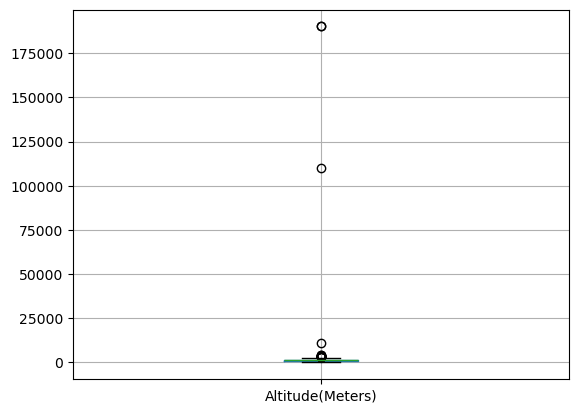

In [242]:
# box plot to check for outliers

df_coffee.boxplot(column='Altitude(Meters)')
plt.show()

In [243]:
# filtering the otlier rows

df_coffee[df_coffee['Altitude(Meters)']>4300]

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters)
543,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,Unknown,expocaccer,cerrado,GERSON NAIMEG,300,2 kg,...,7.58,82.92,0.11,0,0.0,Green,16,"August 15th, 2015",Brazil Specialty Coffee Association,11000.0
896,Arabica,juan luis alvarado romero,Guatemala,la esperanza,beneficio ixchel,"unex guatemala, s.a.",huehuetenango,"AGRICOLA EL PILAR, SA.",25,69 kg,...,7.42,81.58,0.12,0,0.0,Green,0,"June 1st, 2018",Asociacion Nacional Del Café,190164.0
1040,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,cafetales santa matilde,beneficio san carlos,"comercial internacional exportadora, s.a.",jinotega,ROLANDO LACAYO,275,69 kg,...,7.25,80.75,0.12,0,0.0,Green,5,"May 27th, 2016",Asociación de Cafés Especiales de Nicaragua,110000.0
1144,Arabica,juan luis alvarado romero,Guatemala,la esperanza,beneficio ixchel,"unex guatemala, s.a.",oriente,"AGRICOLA EL PILAR, S.A.",25,69 kg,...,7.25,79.75,0.10,0,4.0,Green,1,"June 22nd, 2018",Asociacion Nacional Del Café,190164.0


In [244]:
alti_median = df_coffee['Altitude(Meters)'].median()
alti_median

1300.0

In [245]:
# replacing the missing values with median

df_coffee['Altitude(Meters)'] = df_coffee['Altitude(Meters)'].fillna(alti_median)

In [246]:
# replacing the outlier values with median 

df_coffee.loc[df_coffee['Altitude(Meters)'] > 4300, 'Altitude(Meters)'] = alti_median

*  Replacing outlier values with the median, as coffee cannot be grown above 4000 meters in altitude.

In [247]:
# calculating the mean of altitude
# there is a slight difference between mean and median

alti_mean = df_coffee['Altitude(Meters)'].mean()
alti_mean

1248.8992012823899

In [248]:
# to check whether the missing value of 'Altitude(Meters)' is filled

df_coffee['Altitude(Meters)'].isnull().sum()

0

In [249]:
# to check all the missing values are replaced

df_coffee.isnull().sum().sum()

0

## Changing datatypes

In [250]:
df_coffee.dtypes

Species                       object
Owner                         object
Origin_Country                object
Farm_Name                     object
Mill                          object
Company                       object
Region                        object
Producer                      object
Number_of_Bags                 int32
Bag_Weight_kg                 object
In_Country_Partner            object
Harvest_Year                   int32
Grading_Date          datetime64[ns]
Variety                       object
Processing_Method             object
Aroma                        float64
Flavor                       float64
Aftertaste                   float64
Acidity                      float64
Body                         float64
Balance                      float64
Uniformity                   float64
Clean_Cup                    float64
Sweetness                    float64
Cupper_Points                float64
Total_Cup_Points             float64
Moisture                     float64
C

In [251]:
# changing 'Bag_Weight' data type

df_coffee['Bag_Weight_kg'].head(2)

0    60 kg
1    60 kg
Name: Bag_Weight_kg, dtype: object

In [252]:
df_coffee['Bag_Weight_kg'].value_counts()

Bag_Weight_kg
1 kg        331
60 kg       256
69 kg       200
70 kg       156
2 kg        122
100 lbs      59
30 kg        29
5 lbs        23
6            19
20 kg        14
50 kg        14
10 kg        11
59 kg        10
1 lbs         8
1             7
3 lbs         7
5 kg          7
2 lbs         5
4 lbs         4
80 kg         4
18975 kg      4
0 lbs         3
46 kg         3
29 kg         2
9000 kg       2
25 kg         2
66 kg         2
35 kg         2
12000 kg      2
40 kg         2
6 kg          2
19200 kg      2
15 kg         2
13800 kg      1
100 kg        1
55 lbs        1
4 kg          1
67 kg         1
350 kg        1
3 kg          1
8 kg          1
80 lbs        1
24 kg         1
1500 kg       1
2 kg,lbs      1
0 kg          1
660 kg        1
1218 kg       1
2             1
18 kg         1
150 lbs       1
18000 kg      1
1 kg,lbs      1
132 lbs       1
34 kg         1
130 lbs       1
Name: count, dtype: int64

In [253]:
import re

# Function to convert weights to kg
def convert_to_kg(value):
    value = str(value).strip().lower()
    match = re.match(r"(\d+\.?\d*)\s*(kg|lbs)?", value)
    if match:
        weight, unit = float(match.group(1)), match.group(2)
        if unit == "lbs":
            return round(weight * 0.453592,3) # Convert lbs to kg
        else:
            return weight  # Assume kg if 'kg' is explicitly mentioned or unit is missing
    return None  # Return None for invalid values

# Apply the conversion function to the Bag_Weight column
df_coffee['Bag_Weight_kg'] = df_coffee['Bag_Weight_kg'].apply(convert_to_kg)


df_coffee['Bag_Weight_kg'].head()

0    60.0
1    60.0
2     1.0
3    60.0
4    60.0
Name: Bag_Weight_kg, dtype: float64

In [254]:
df_coffee['Bag_Weight_kg'].isnull().sum()

0

In [307]:
df_coffee['Bag_Weight_kg'].dtypes

dtype('float64')

In [255]:
# converting 'Expiration' column into date time format
# creating new colum Expiration_Year

# Clean up ordinal suffixes if present
df_coffee['Expiration'] = df_coffee['Expiration'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True).str.strip()

# Convert to datetime, handling errors gracefully
df_coffee['Expiration'] = pd.to_datetime(df_coffee['Expiration'], errors='coerce')

# Display the result
print(df_coffee['Expiration'].head())

0   2016-04-03
1   2016-04-03
2   2011-05-31
3   2016-03-25
4   2016-04-03
Name: Expiration, dtype: datetime64[ns]


In [256]:
df_coffee['Expiration'].isnull().sum()

0

In [257]:
df_coffee.dtypes

Species                       object
Owner                         object
Origin_Country                object
Farm_Name                     object
Mill                          object
Company                       object
Region                        object
Producer                      object
Number_of_Bags                 int32
Bag_Weight_kg                float64
In_Country_Partner            object
Harvest_Year                   int32
Grading_Date          datetime64[ns]
Variety                       object
Processing_Method             object
Aroma                        float64
Flavor                       float64
Aftertaste                   float64
Acidity                      float64
Body                         float64
Balance                      float64
Uniformity                   float64
Clean_Cup                    float64
Sweetness                    float64
Cupper_Points                float64
Total_Cup_Points             float64
Moisture                     float64
C

### Data types are converted to a standard format.

### Checking for outliers using box plot

In [258]:
df_coffee_num = df_coffee[['Number_of_Bags', 'Bag_Weight_kg','Harvest_Year', 'Grading_Date',
                           'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                           'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points',
                           'Total_Cup_Points', 'Moisture', 'Category1_Defects', 'Quakers',
                           'Category2_Defects', 'Expiration',  'Altitude(Meters)']]

In [259]:
df_coffee_num.describe()

,Number_of_Bags,Bag_Weight_kg,Harvest_Year,Grading_Date,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category1_Defects,Quakers,Category2_Defects,Expiration,Altitude(Meters)
count,1339.000000,1339.000000,1339.000000,1339,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,...,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339,1339.000000
mean,159.187453,178.747879,2013.577296,2014-03-22 19:15:00.672143360,7.770187,7.520426,7.401083,7.535706,7.517498,7.518013,...,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173264,3.556385,2015-03-22 19:15:00.672143360,1248.899201
min,0.000000,0.000000,2009.000000,2010-04-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-04-09 00:00:00,1.000000
25%,14.000000,1.000000,2012.000000,2012-08-17 00:00:00,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,...,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,2013-08-17 00:00:00,1045.000000
50%,175.000000,45.359000,2013.000000,2014-04-03 00:00:00,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,...,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,2015-04-03 00:00:00,1300.000000
75%,275.000000,69.000000,2015.000000,2015-07-17 00:00:00,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,...,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,2016-07-16 00:00:00,1500.000000
max,3200.000000,19200.000000,2018.000000,2018-01-19 00:00:00,200.000000,8.830000,8.670000,8.750000,8.580000,8.750000,...,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,2019-01-19 00:00:00,4287.000000
std,173.673555,1523.698216,1.914610,NaN,5.534440,0.398442,0.404463,0.379827,0.370064,0.408943,...,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.831824,5.312541,NaN,505.566674


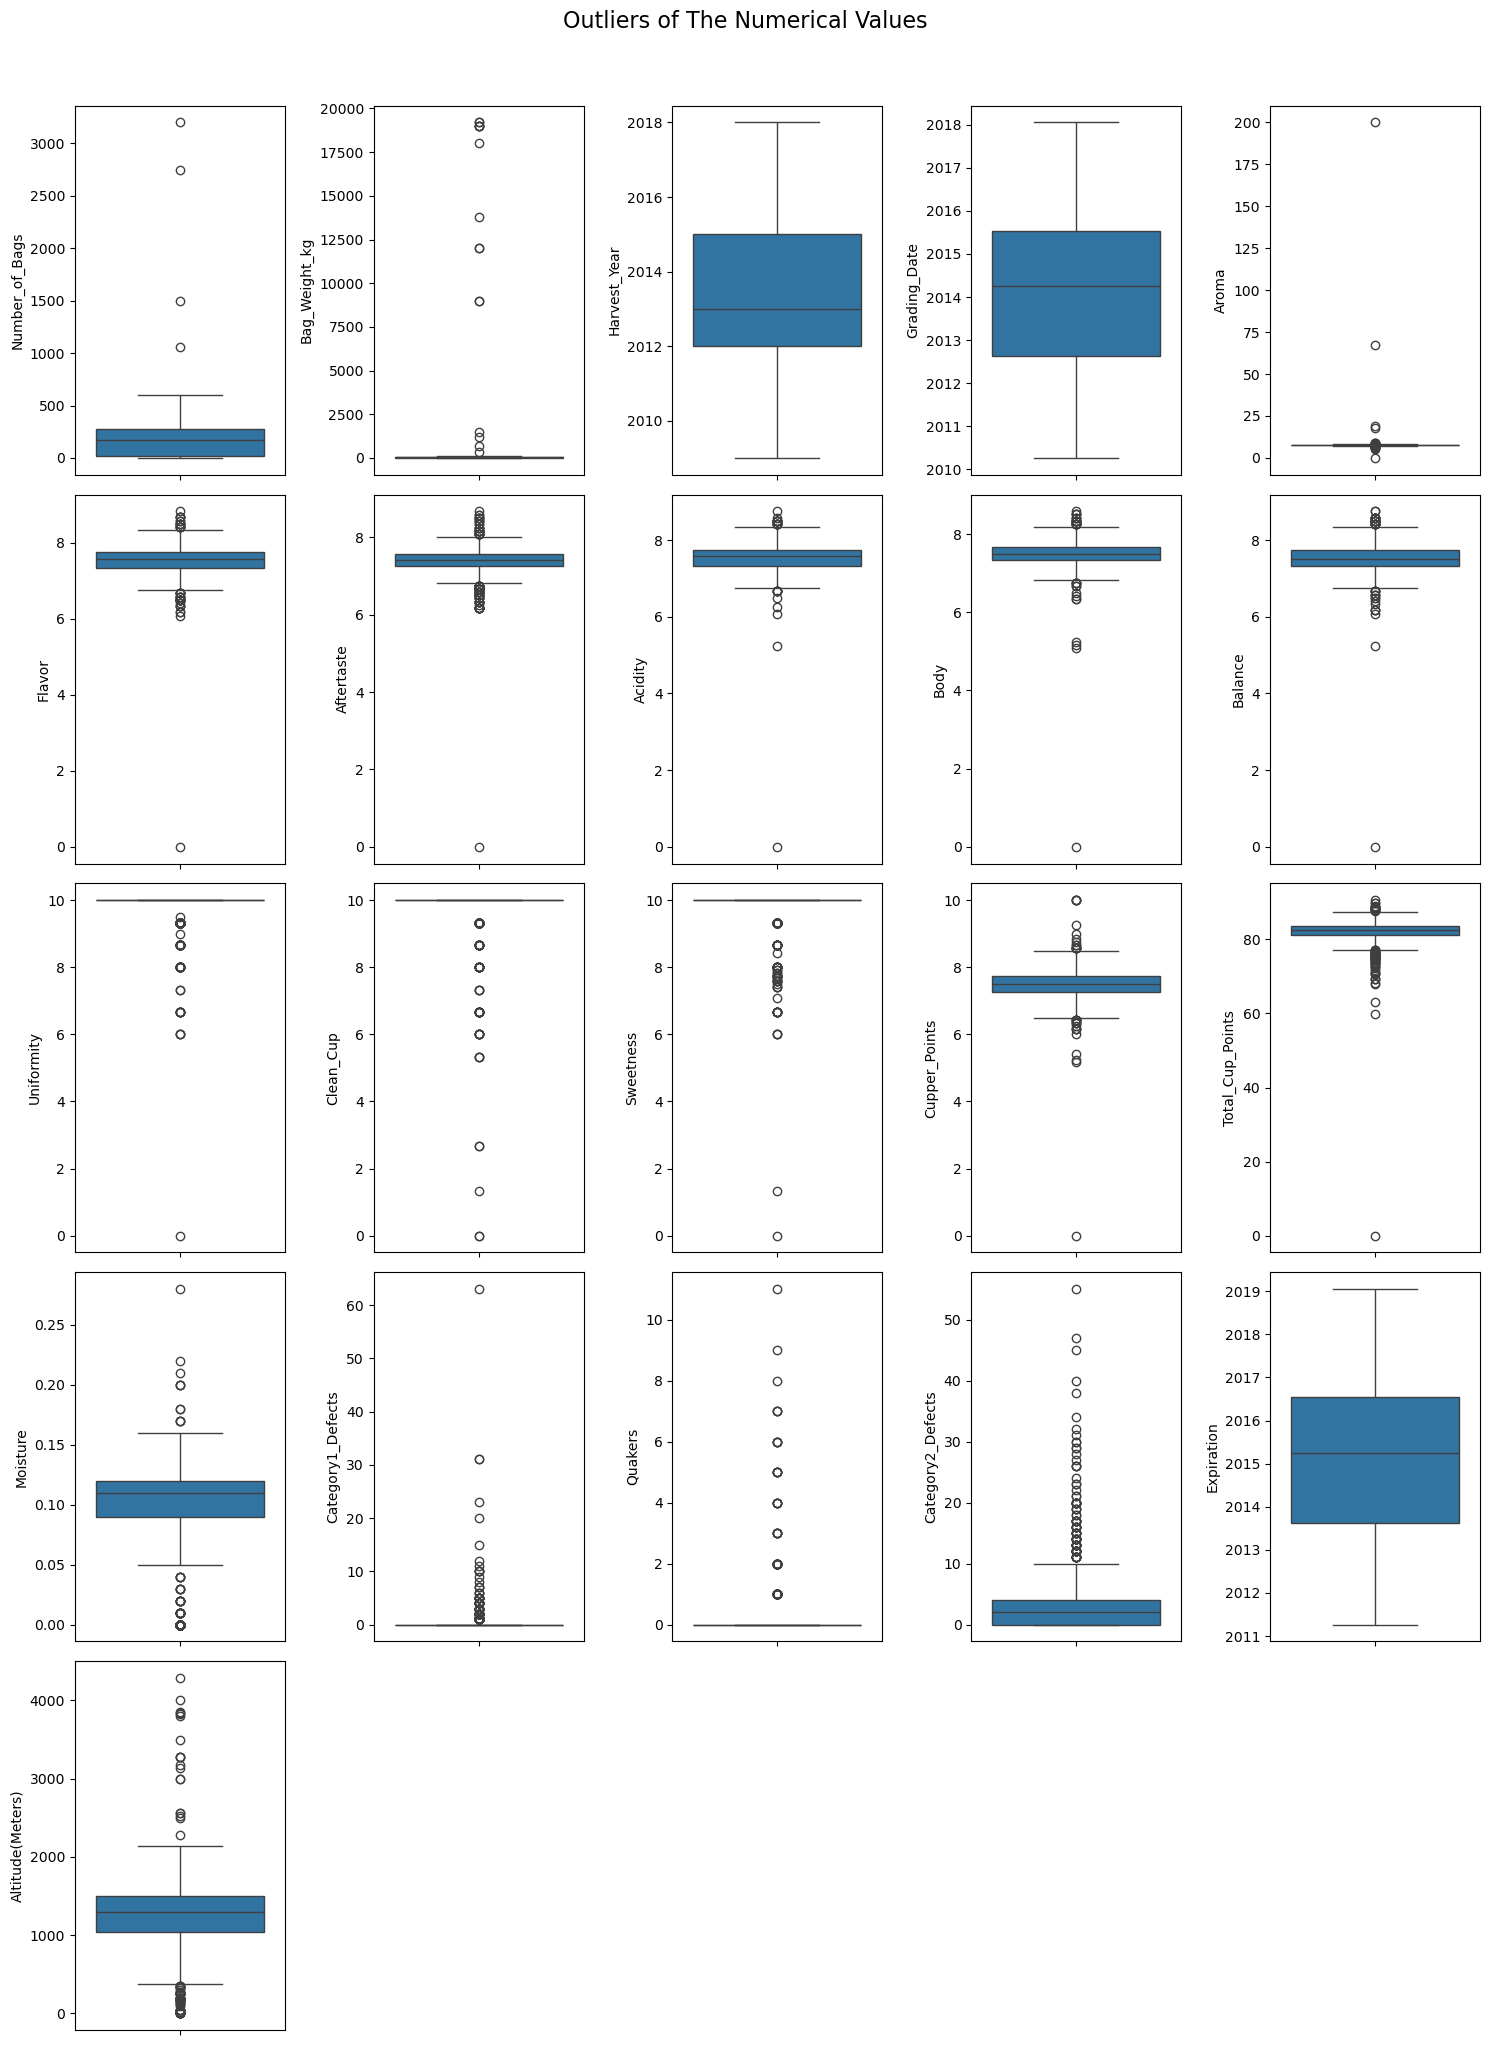

In [260]:
# Calculate the number of rows and columns needed for 23 subplots
n_columns = 5  # Number of columns in the grid
n_rows = (len(df_coffee_num.columns) // n_columns) + (len(df_coffee_num.columns) % n_columns != 0)  # Number of rows required

plt.figure(figsize=(15, 4 * n_rows))  # Adjust the figure size based on the number of rows

# Set a title for the entire figure
plt.suptitle('Outliers of The Numerical Values', fontsize=16, y=1.02)

# Plot the boxplots for each column in df_coffee_num
for i, cols in enumerate(df_coffee_num.columns, start=1):
    plt.subplot(n_rows, n_columns, i)
    sns.boxplot(data=df_coffee_num, y=cols)
    plt.tight_layout()

plt.show()



In [261]:
df_coffee.columns

Index(['Species', 'Owner', 'Origin_Country', 'Farm_Name', 'Mill', 'Company',
       'Region', 'Producer', 'Number_of_Bags', 'Bag_Weight_kg',
       'In_Country_Partner', 'Harvest_Year', 'Grading_Date', 'Variety',
       'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points',
       'Total_Cup_Points', 'Moisture', 'Category1_Defects', 'Quakers', 'Color',
       'Category2_Defects', 'Expiration', 'Certification', 'Altitude(Meters)'],
      dtype='object')

In [262]:
# capitalized the first letter of each word in all string columns

df_coffee = df_coffee.apply(lambda x: x.str.title() if x.dtype == "object" else x)

#### Completed data preprocessing and cleaning.

# Univariate Analysis


## Types Of Coffee Species

In [263]:
# species types using .unique()

df_coffee['Species'].unique()

array(['Arabica', 'Robusta'], dtype=object)

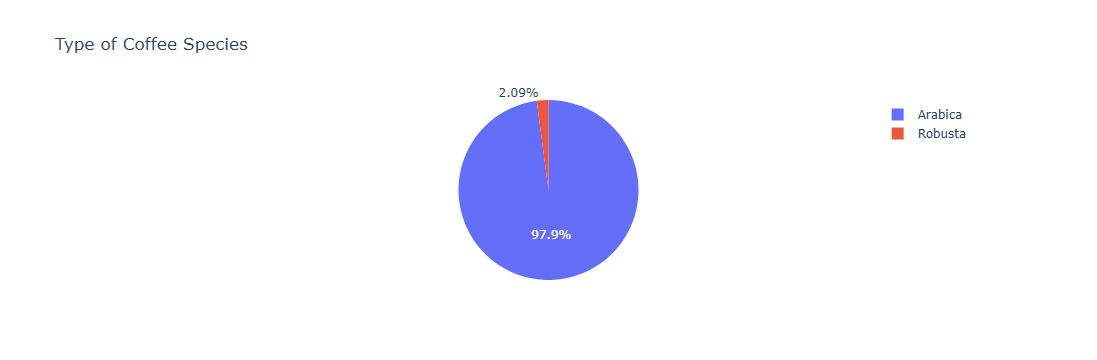

In [264]:
# distribution of species using pie chart


species_pie = px.pie(values=df_coffee['Species'].value_counts().values,  # Counts of each species
                     names=df_coffee['Species'].value_counts().index,    # Species names
                     title="Type of Coffee Species")


species_pie.show()

* There are two types of species
    * __Arabica__
    * __Robusta__
* Arabica constitutes 98% of the dataset (1311 entries), highlighting its widespread preference and importance in the coffee industry.
* Robusta accounts for only 2% of the dataset (28 entries), indicating its limited focus compared to Arabica.

## Harvest Years

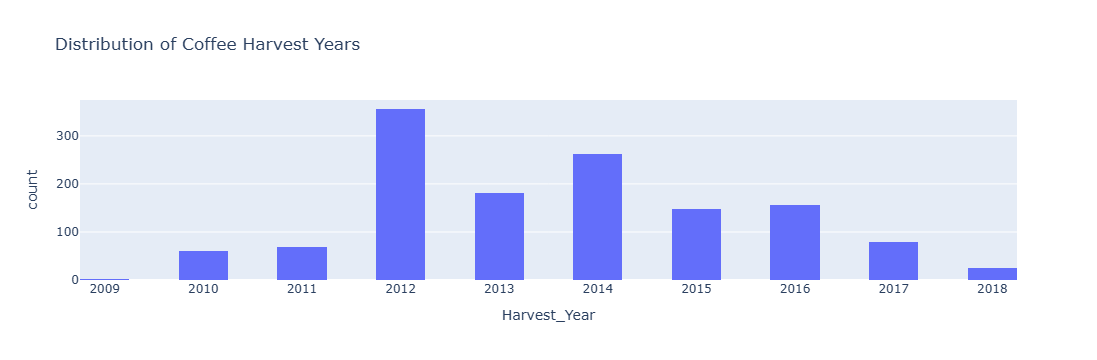

In [265]:
# Create a histogram for the 'Harvest_Year' column
harvest = px.histogram(
    df_coffee,
    x='Harvest_Year',  # Specify column directly
    title='Distribution of Coffee Harvest Years',
    nbins=20  # Adjust the number of bins for clarity
)

harvest.show()


#### Harvest Years

* The year __2012__ has the highest number of coffee harvests in the dataset, indicating that it was a dominant year for coffee production.
* The years __2014__ and __2013__ follow closely behind 2012, suggesting these years also saw a significant amount of coffee production.
* The years __2009__ and __2018__ show relatively lower harvest numbers, possibly indicating either a decrease in coffee production or fewer records available for these years.

## Dominance in Country Partner

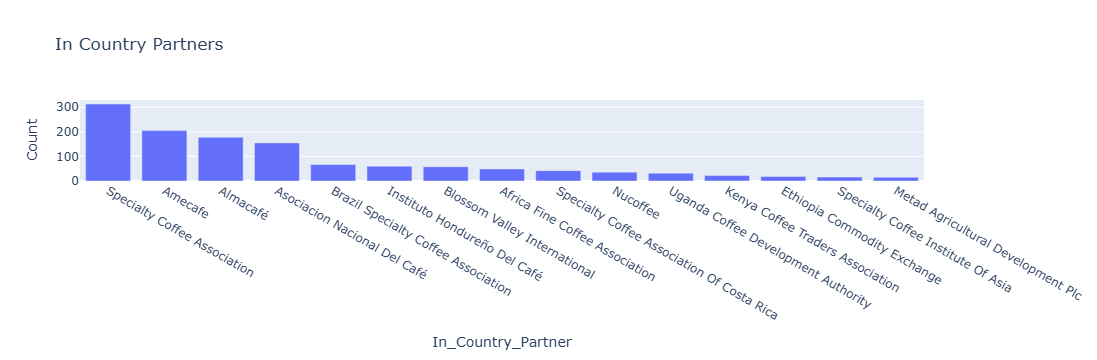

In [266]:
# In Country Partner
partner_counts = df_coffee['In_Country_Partner'].value_counts().reset_index().head(15)
partner_counts.columns = ['In_Country_Partner', 'Count']  # Rename columns

# Create a bar plot
partner = px.bar(
    partner_counts,
    x='In_Country_Partner',
    y='Count',
    title='In Country Partners',
    )

partner.show()

#### In Country Partner
* `Specialty Coffee Association appears` as a dominant player, likely due to its global recognition and impact on coffee standards, training, and certification.
* `Amecafe (The Coffee Exporters Association of Mexico)` holds substantial influence, likely due to Mexico's status as one of the largest coffee producers.
* `Almacafé` is a significant player in the Colombian coffee industry, contributing to the high volume of Colombian coffee exports.

## Proceessing Methods

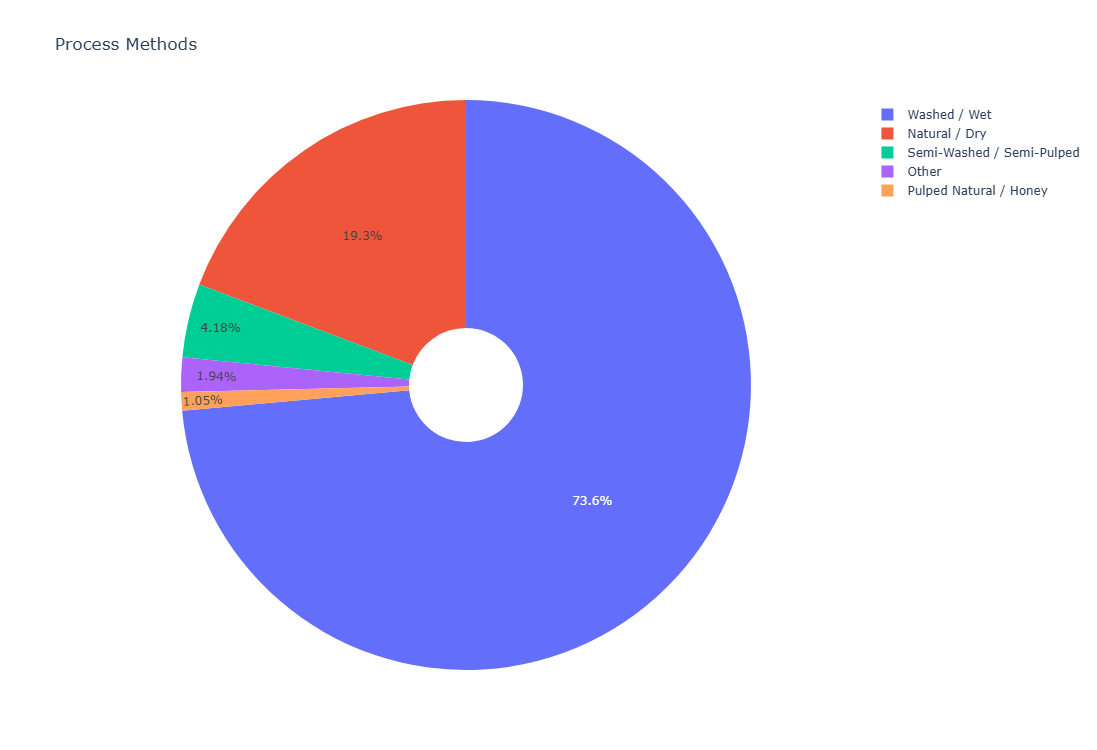

In [267]:
# Process Methods 

process = px.pie(values=df_coffee['Processing_Method'].value_counts().values,  # Counts of each species
                     names=df_coffee['Processing_Method'].value_counts().index,    # Species names
                     title="Process Methods", hole = 0.2,
                     width = 750, height = 750
                )

process.show()

#### Processing Methods

* `The Washed / Wet method` is the most commonly used, with 73.6% of the coffee following this method.
* `The Natural / Dry method`, while less popular than the Washed / Wet method, is still used by 19.3% of the coffee.
* Other methods are comparatively less popular.

# Bivariate Analysis


In [268]:
# create a new column to standardize Bag_Weight_kg
def standardize_bag_weight(row):
    # if Bag_Weight_kg is too large (like 12000, 18000), it's the total weight for all bags
    if row['Bag_Weight_kg'] > 100:  # you can adjust this threshold based on your data
        return row['Bag_Weight_kg'] / row['Number_of_Bags']
    else:
        return row['Bag_Weight_kg']

# apply the function to standardize Bag_Weight_kg
df_coffee['Bag_Weight_kg'] = df_coffee.apply(standardize_bag_weight, axis=1)

# now check the first few rows to ensure the changes have been applied correctly
df_coffee[['Number_of_Bags', 'Bag_Weight_kg']].head()


,Number_of_Bags,Bag_Weight_kg
0,300,60.0
1,300,60.0
2,5,1.0
3,320,60.0
4,300,60.0


In [269]:
# 'Total_Production' = 'Number_of_Bags'  *  'Bag_Weight_kg'

df_coffee['Total_Production'] = df_coffee['Number_of_Bags'] * df_coffee['Bag_Weight_kg']
df_coffee['Total_Production'].head()

df_coffee[['Number_of_Bags', 'Bag_Weight_kg','Total_Production']].head()

,Number_of_Bags,Bag_Weight_kg,Total_Production
0,300,60.0,18000.0
1,300,60.0,18000.0
2,5,1.0,5.0
3,320,60.0,19200.0
4,300,60.0,18000.0


## Top 10 Coffee Producer by Origin Country

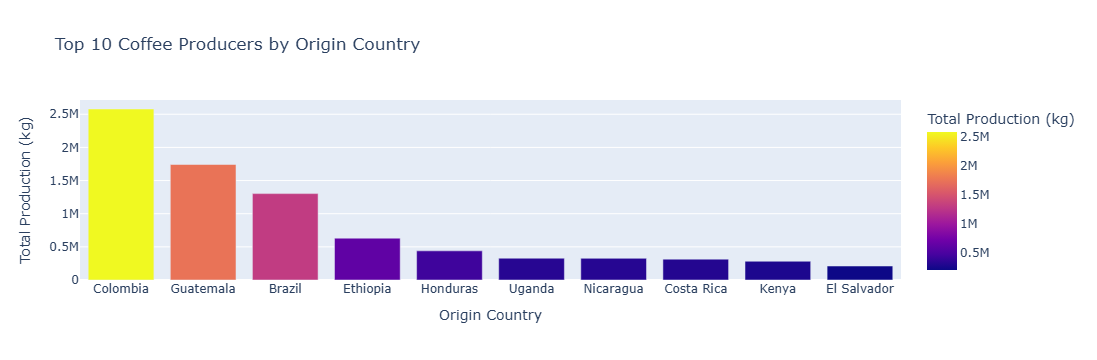

In [270]:
# group by 'Origin_Country' and calculate the total production
origin_production = df_coffee.groupby('Origin_Country')['Total_Production'].sum().reset_index()

# sort values in descending order to see the top 10 countries with the highest production
origin_production = origin_production.sort_values('Total_Production', ascending=False).head(10)

# plot using Plotly
origin = px.bar(
            origin_production,
            x='Origin_Country',
            y='Total_Production',
            title='Top 10 Coffee Producers by Origin Country',
            labels={'Origin_Country': 'Origin Country', 'Total_Production': 'Total Production (kg)'},
            color='Total_Production')

origin.show()

In [271]:
origin_production.head(10)

,Origin_Country,Total_Production
3,Colombia,2579350.300
9,Guatemala,1742215.078
0,Brazil,1303164.536
8,Ethiopia,630959.874
11,Honduras,439724.000
30,Uganda,328638.000
21,Nicaragua,326800.818
4,Costa Rica,314679.925
15,Kenya,282651.000
7,El Salvador,210701.000


#### Top 10 Coffee Producers by Origin Country

* Colombia leads coffee production with over 2.5 million kg, significantly ahead of other countries. Its favorable climate and well-established coffee industry contribute to this high yield.
* Ranked 2nd with 1.7 million kg, Guatemala is known for its high-altitude coffee farms, which produce beans with unique flavor profiles. This emphasizes the country's premium coffee quality and steady production.
* Despite being 3rd with 1.3 million kg, Brazil remains one of the largest coffee producers globally. Its extensive mechanized farms and diverse coffee varieties ensure consistent production.
* Countries like Ethiopia and Honduras, with 630k and 439k kg respectively, highlight the contribution of African and Central American regions to the global coffee market, known for their unique, flavorful coffee beans.

## Top 10 Owners and Their Countries by Total Production

In [272]:
# group by 'Origin_Country' and 'Owner' and calculate total production
owner_country = df_coffee.groupby(['Origin_Country', 'Owner'])['Total_Production'].sum().reset_index()

# gort the results by 'Total_Production' in descending order
owner_country_sorted = owner_country.sort_values(by='Total_Production', ascending=False)

owner_country_sorted.head(10)


,Origin_Country,Owner,Total_Production
98,Guatemala,Juan Luis Alvarado Romero,1645705.0
31,Colombia,Exportadora De Cafe Condor S.A,942900.0
38,Colombia,Racafe & Cia S.C.A,845651.0
9,Brazil,Ipanema Coffees,521684.0
26,Colombia,Carcafe Ltda Ci,434130.0
1,Brazil,Bourbon Specialty Coffees,276540.0
105,Honduras,Bismarck Castro,260273.0
29,Colombia,Compañia Colombiana Agroindustrial S.A,210000.0
70,Ethiopia,Asefa Dukamo Keroma,192000.0
47,Costa Rica,"Ceca, S.A.",166875.0


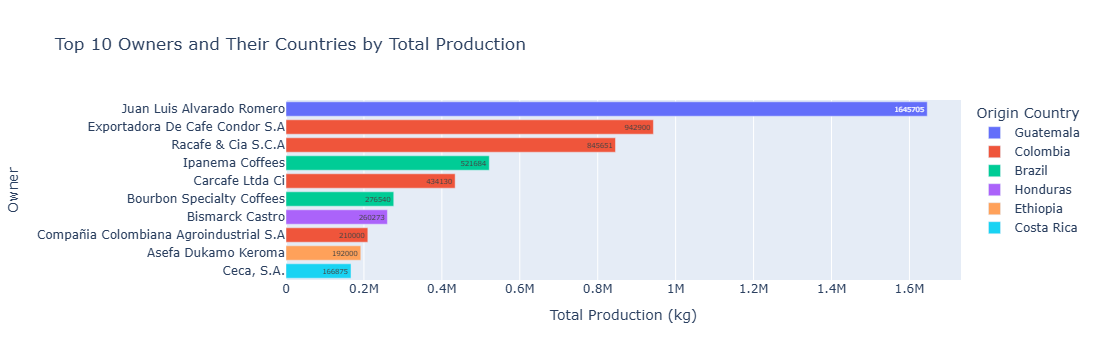

In [273]:
# get the top 10 rows for visualization
top_10_data = owner_country_sorted.head(10)

# Create a horizontal bar chart
top10 = px.bar(
    top_10_data,
    x='Total_Production',
    y='Owner',
    color='Origin_Country',
    orientation='h',
    title='Top 10 Owners and Their Countries by Total Production',
    labels={'Total_Production': 'Total Production (kg)', 'Owner': 'Owner'},
    text='Total_Production'  # Display values on the bars
)

# Update layout for better readability
top10.update_layout(
    yaxis=dict(title='Owner', categoryorder='total ascending'),
    xaxis=dict(title='Total Production (kg)'),
    legend_title_text='Origin Country',
    height=600
)

top10.show()


#### Top 10 Owners and Their Countries by Total Production

* Juan Luis Alvarado Romero (Guatemala) Leads the List: With 1.64 million kg, Juan Luis Alvarado Romero from Guatemala is the top coffee producer among individual owners, significantly surpassing others.
* Colombian Owners Dominate in Representation: Colombia has 4 entries in the top 10, with notable contributions from Exportadora De Cafe Condor S.A (943k kg), Racafe & Cia S.C.A (846k kg), and others. This highlights Colombia's strong infrastructure and focus on coffee production.
Diversity in Origin Countries:
* Apart from Colombia and Guatemala, other nations like Brazil, Honduras, Ethiopia, and Costa Rica also feature prominently, showcasing a broad global contribution to high coffee production.
* Significant Individual Contributions:Owners like Ipanema Coffees (521k kg) in Brazil and Bismarck Castro (260k kg) in Honduras demonstrate the critical role of large-scale individual producers in shaping global coffee markets.

## Total Production by Harvest Year and Altitude Range

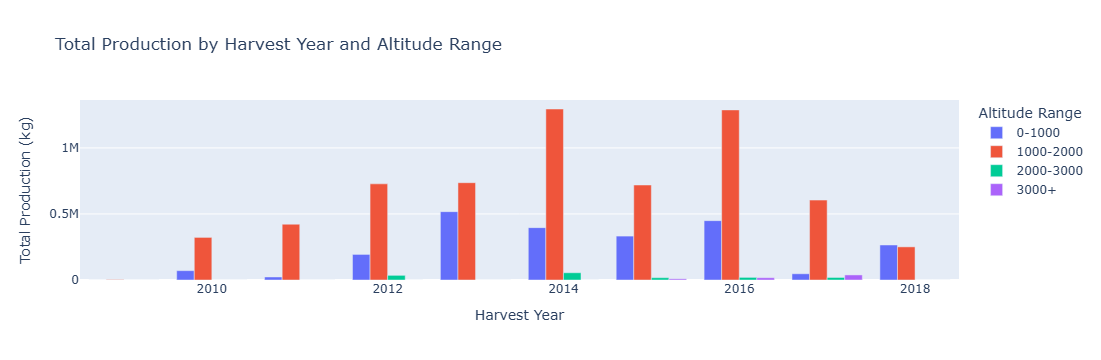

In [274]:
# Create bins for Altitude(Meters)
altitude_bins = [0, 1000, 2000, 3000, float('inf')]
altitude_labels = ['0-1000', '1000-2000', '2000-3000', '3000+']

# Group data by 'Harvest_Year' and 'Altitude_Bins', summing the 'Total_Production'
grouped_data = df_coffee.groupby([ 'Harvest_Year', pd.cut(df_coffee['Altitude(Meters)'], bins=altitude_bins, 
                                                          labels=altitude_labels, include_lowest=True)])['Total_Production'].sum().reset_index()

# Rename the second column for clarity
grouped_data.rename(columns={'Altitude(Meters)': 'Altitude_Bins'}, inplace=True)

# Create the plot
yearwise_prod = px.bar(
    grouped_data,
    x='Harvest_Year',
    y='Total_Production',
    color='Altitude_Bins',
    title='Total Production by Harvest Year and Altitude Range',
    labels={'Harvest_Year': 'Harvest Year', 'Total_Production': 'Total Production (kg)', 'Altitude_Bins': 'Altitude Range'},
    barmode='group'
)

# Show the plot
yearwise_prod.show()

#### Total Production by Harvest Year and Altitude Range


* The 1000-2000 altitude range consistently yields the highest production.
* The 0-1000 range also shows significant production, though slightly lower than the 1000-2000 range.
* Altitudes above 2000 meters have comparatively lower production levels.
* Production peaked in 2016 and 2014, followed by notable outputs in 2013, 2015, and 2012.

## Category 1 vs Category 2 Defects

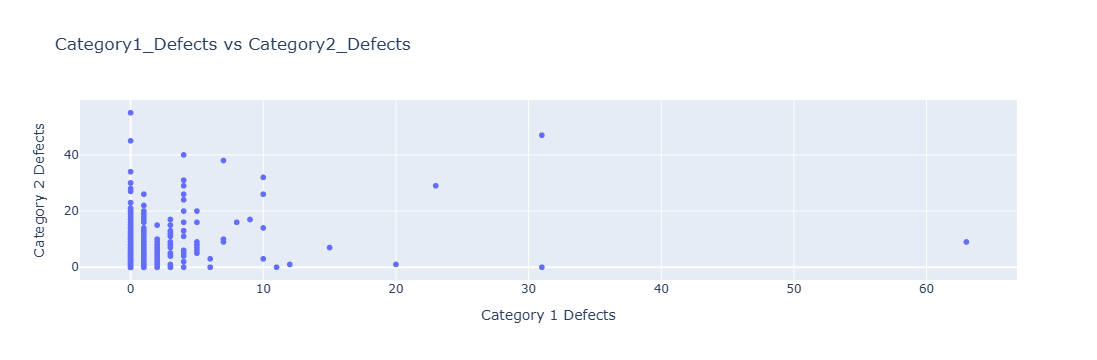

In [275]:
# scatter plot to visualize the relationship between Category1_Defects and Category2_Defects



defects = px.scatter(
    df_coffee, 
    x='Category1_Defects', 
    y='Category2_Defects', 
    title="Category1_Defects vs Category2_Defects",
    labels={'Category1_Defects': 'Category 1 Defects', 'Category2_Defects': 'Category 2 Defects'},
)

defects.show()


* Most data points are concentrated around Category1_Defects = 0 and Category2_Defects = 0. This suggests that the majority of the entries in your dataset do not have significant defects in either category. In other words, a large portion of the coffee beans in your dataset has little to no defects in both categories.
* For small defect values (e.g., Category1_Defects = 1-3 and Category2_Defects = 1-3), we can expect a moderate positive correlation, which implies that when one category of defect occurs, the other might also occur. This could suggest that beans with some defects in one category are likely to have corresponding defects in the other category as well.
* There are fewer occurrences of higher values for defects (e.g., Category1_Defects > 5 and Category2_Defects > 10). This indicates that defects in these higher ranges are rare in the dataset. If these high values do appear, they are more likely to be outliers rather than general trends.
* The data might have a little out liers.

## Moisture vs Variety

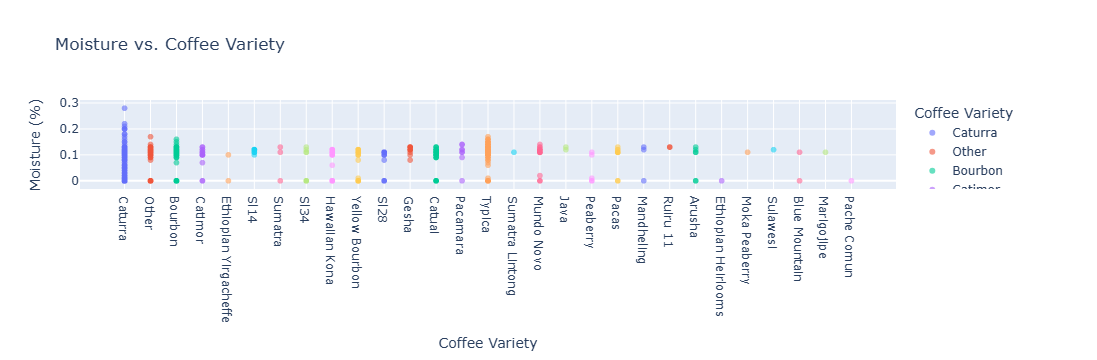

In [276]:

# scatter plot for Moisture vs. Variety
moisture_variety_scatter = px.scatter(
    df_coffee,
    x='Variety',
    y='Moisture',
    title='Moisture vs. Coffee Variety',
    labels={'Variety': 'Coffee Variety', 'Moisture': 'Moisture (%)'},
    color='Variety',  # Different colors for each variety
    opacity=0.6  # Adjust opacity to make points clearer
)

moisture_variety_scatter.show()


#### Moisture vs. Coffee Variety

* Catura thrives across a wide range of moisture conditions, making it highly adaptable.
* Most other coffee varieties are cultivated within a moisture range of 0.08 to 0.14.
* Moisture levels above 1.7 are not common across varieties, indicating limited adaptability.

## Certification Partner

* This shows that In Country Partner Provides the certificates.

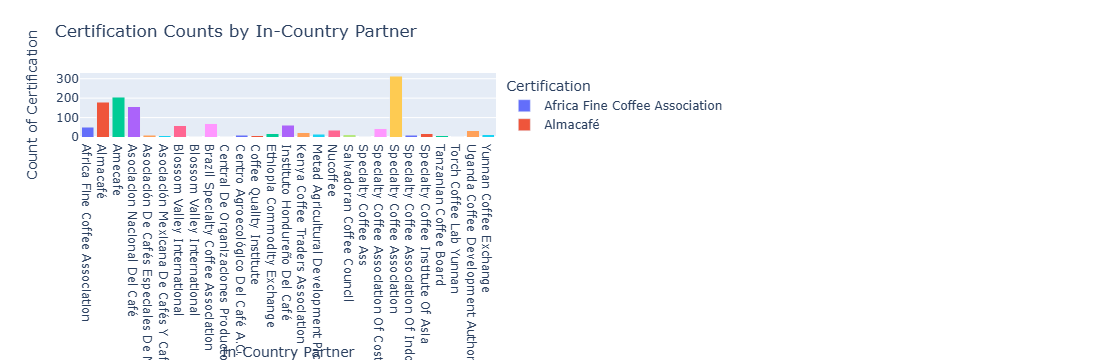

In [277]:
# Group by 'In_Country_Partner' and 'Certification' and get the count
partner_certification_counts = df_coffee.groupby(['In_Country_Partner', 'Certification']).size().reset_index(name='Count')

# Create a bar plot
certificate_partner = px.bar(
                            partner_certification_counts,
                            x='In_Country_Partner',
                            y='Count',
                            color='Certification',
                            title='Certification Counts by In-Country Partner',
                            labels={'In_Country_Partner': 'In-Country Partner', 'Count': 'Count of Certification'},
                            barmode='stack',  # You can use 'group' for side-by-side bars instead of stacked bars
)

# Show the plot
certificate_partner.show()

In [278]:
# in aroma there are outliers it may diturb the whole heat map 
# so replacing the outliers with median

df_coffee.loc[df_coffee['Aroma'] > 10, 'Aroma'] = df_coffee['Aroma'].median()


In [279]:
# numerical of Total_Cup_Points points is stored in total_cup_points

total_cup_points = df_coffee[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body','Balance', 
                              'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points','Total_Cup_Points']]

In [280]:
# .describe() shows 5 number summary, count, mean and standard deviation

total_cup_points.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,7.565385,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851
std,0.376454,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000


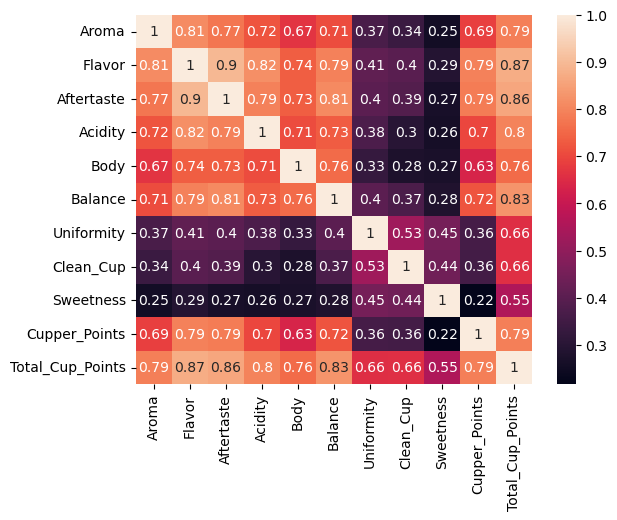

In [281]:
# heat_map for  total_cup_points

corr = total_cup_points.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

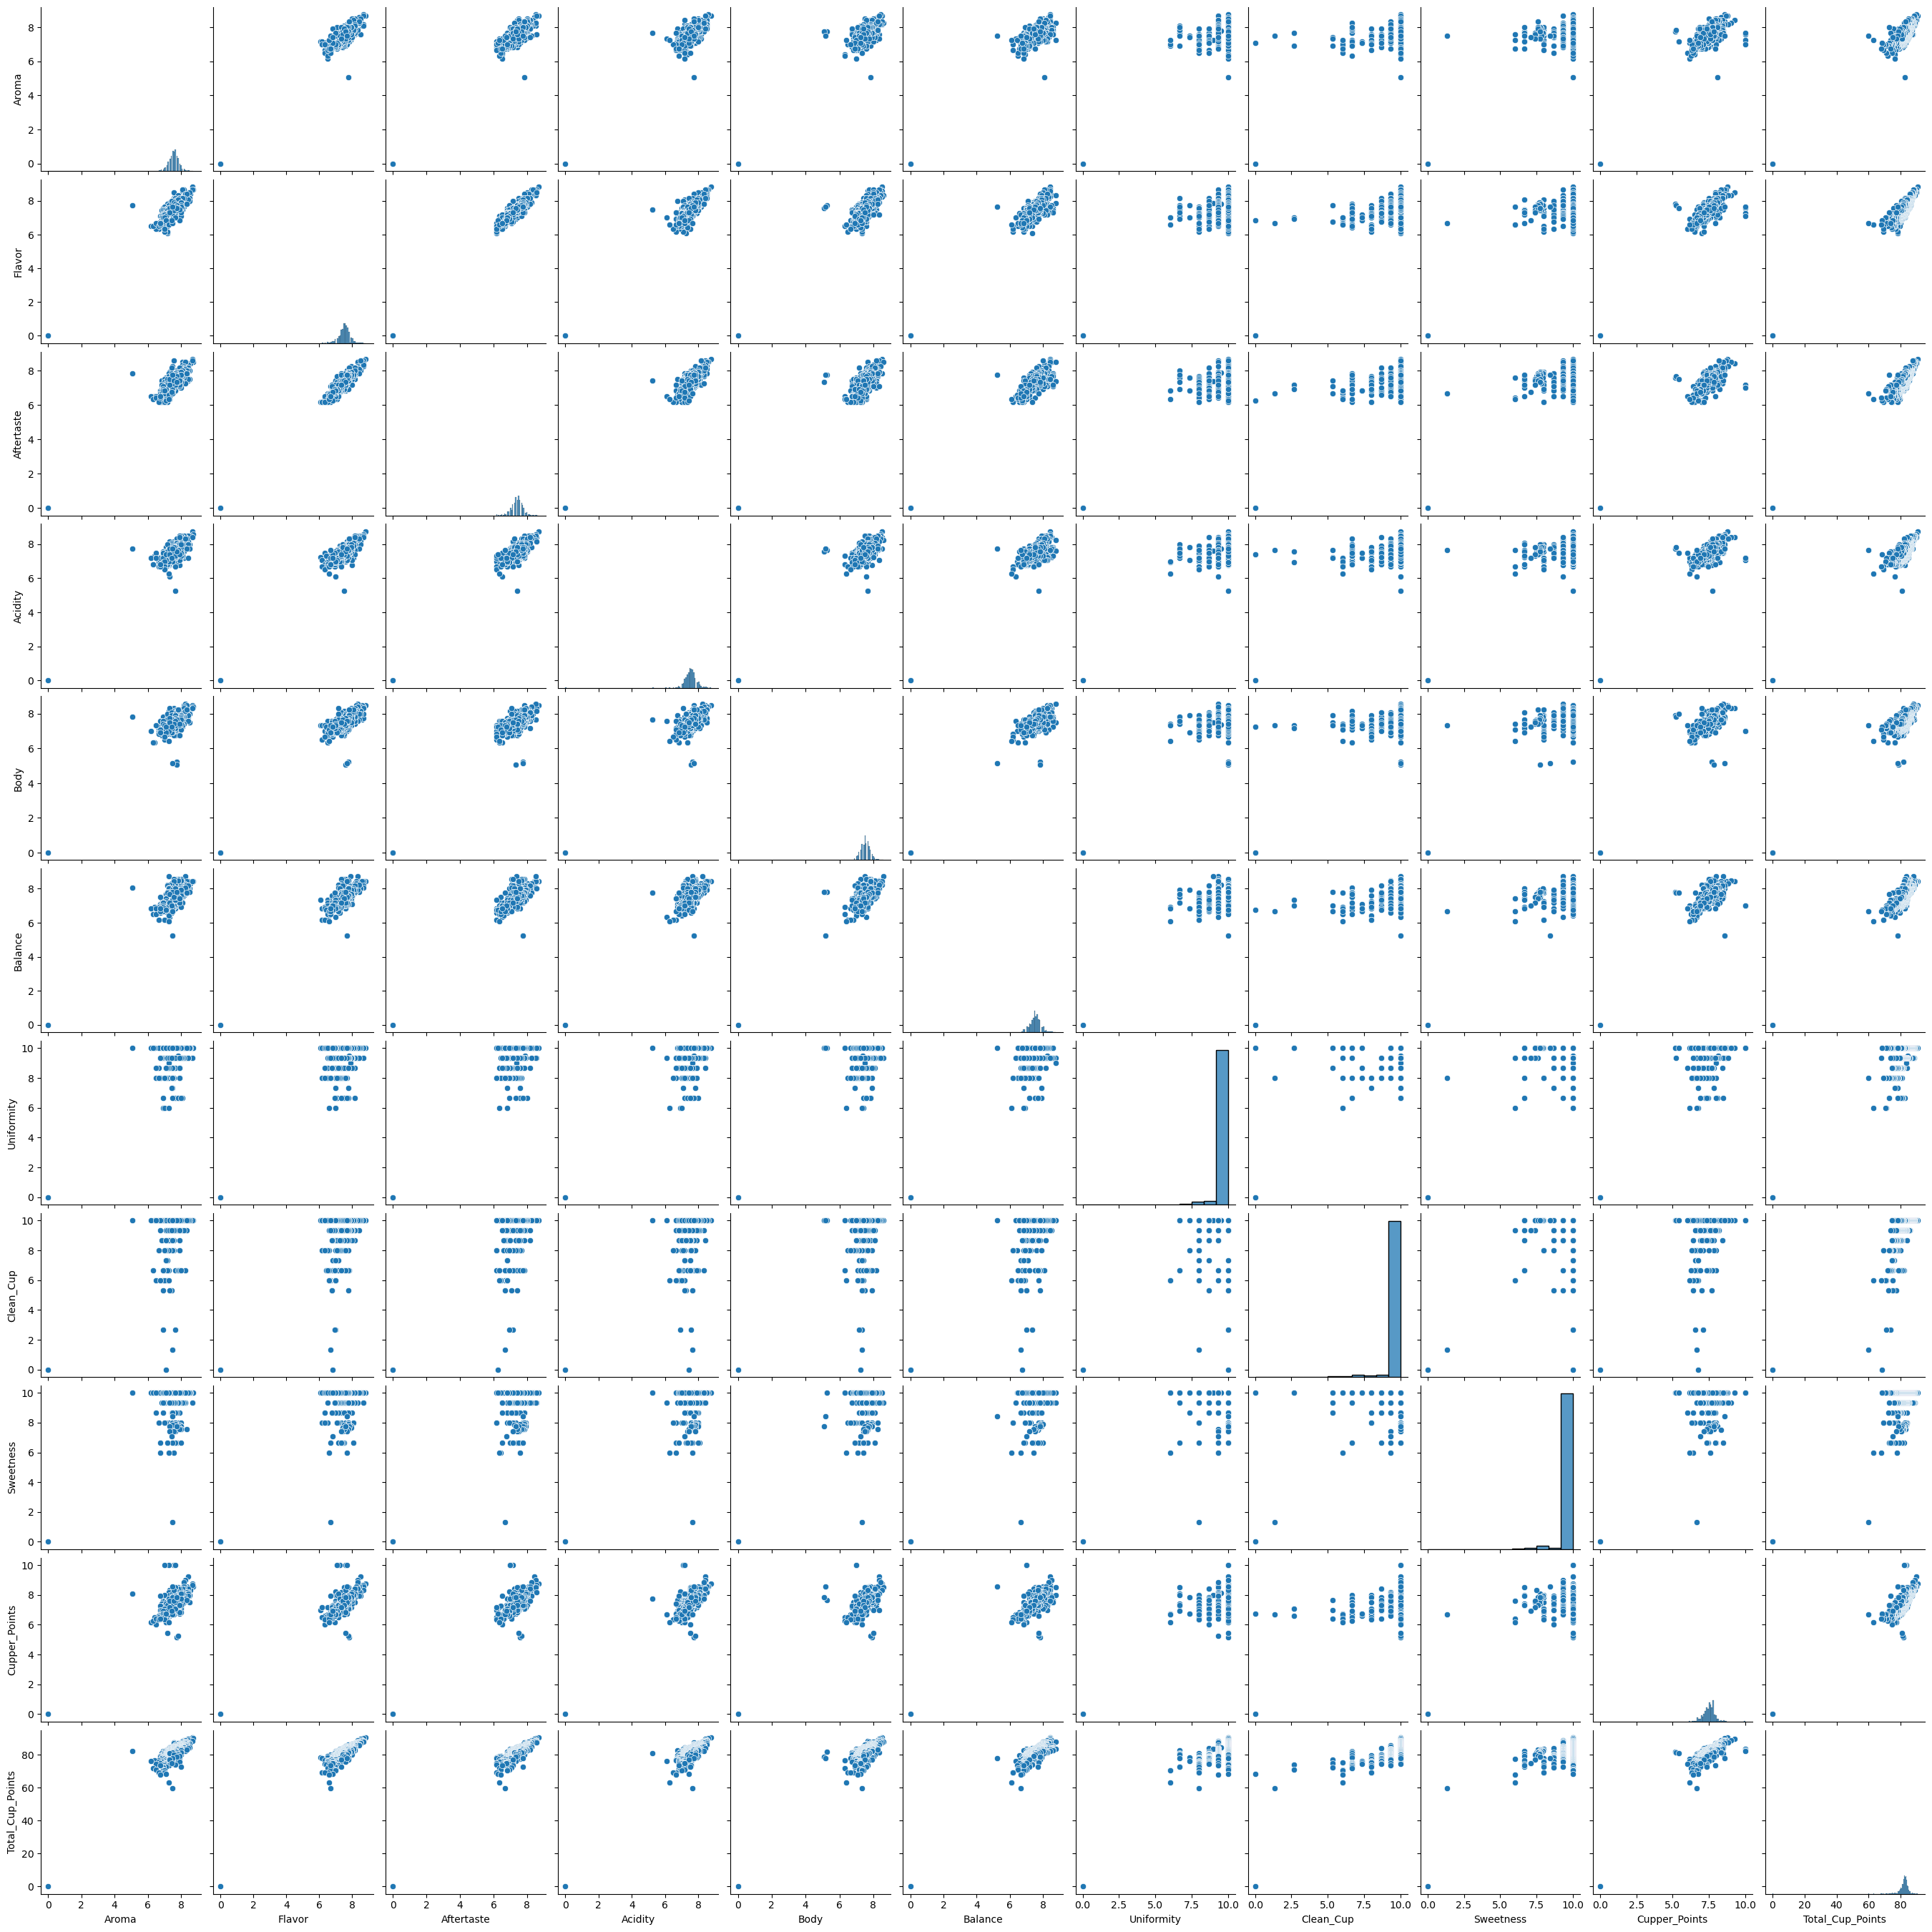

In [282]:
# pair plot for total_cup_points

sns.pairplot(data=total_cup_points)
plt.show()

# Derived Metrics

## Creating a new column Validity_Days 

In [283]:
# Ensure both columns are in datetime format
df_coffee['Grading_Date'] = pd.to_datetime(df_coffee['Grading_Date'])
df_coffee['Expiration'] = pd.to_datetime(df_coffee['Expiration'])

# Calculate the difference in days
df_coffee['Validity_Days'] = (df_coffee['Expiration'] - df_coffee['Grading_Date']).dt.days


df_coffee[['Grading_Date', 'Expiration', 'Validity_Days']].head()

,Grading_Date,Expiration,Validity_Days
0,2015-04-04,2016-04-03,365
1,2015-04-04,2016-04-03,365
2,2010-05-31,2011-05-31,365
3,2015-03-26,2016-03-25,365
4,2015-04-04,2016-04-03,365


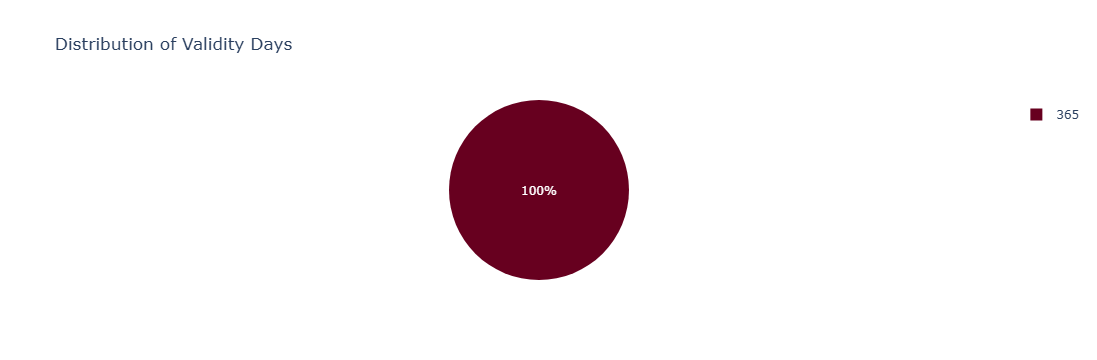

In [284]:

# Assuming df_coffee contains the Validity_Days column
validity_counts = df_coffee['Validity_Days'].value_counts().reset_index()
validity_counts.columns = ['Validity_Days', 'Count']

# Create a pie chart
validity_pie = px.pie(
    validity_counts,
    names='Validity_Days',
    values='Count',
    title='Distribution of Validity Days',
    color_discrete_sequence=px.colors.sequential.RdBu  
)

# Show the chart
validity_pie.show()


In [285]:
df_coffee['Validity_Days'].value_counts()

Validity_Days
365    1339
Name: count, dtype: int64

* The Validity_Days for all coffee in the dataset is 365, which implies that the expiration period for all the coffee is set to 1 year. 

## Creating a new column Rating

In [286]:
# define conditions and corresponding love-themed ratings
conditions = [
    (df_coffee['Total_Cup_Points'] >= 90),
    (df_coffee['Total_Cup_Points'] >= 85) & (df_coffee['Total_Cup_Points'] < 90),
    (df_coffee['Total_Cup_Points'] >= 80) & (df_coffee['Total_Cup_Points'] < 85),
    (df_coffee['Total_Cup_Points'] >= 70) & (df_coffee['Total_Cup_Points'] < 80),
    (df_coffee['Total_Cup_Points'] < 70),
]

ratings = [
    "1-Divine Devotion",      # 90+
    "2-Eternal Love",         # 85-89
    "3-Sweet Harmony",        # 80-84
    "4-A Fleeting Crush",     # 70-79
    "5-Lost in the Grounds",  # <70
]

# add a new column 'Rating'
df_coffee['Rating'] = np.select(conditions, ratings, default="Not Rated")


df_coffee[['Total_Cup_Points', 'Rating']].head()

,Total_Cup_Points,Rating
0,90.58,1-Divine Devotion
1,89.92,2-Eternal Love
2,89.75,2-Eternal Love
3,89.00,2-Eternal Love
4,88.83,2-Eternal Love


In [287]:
df_coffee.head()

,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Category1_Defects,Quakers,Color,Category2_Defects,Expiration,Certification,Altitude(Meters),Total_Production,Validity_Days,Rating
0,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,Metad Plc,300,60.0,...,0,0.0,Green,0,2016-04-03,Metad Agricultural Development Plc,2075.0,18000.0,365,1-Divine Devotion
1,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,Metad Plc,300,60.0,...,0,0.0,Green,1,2016-04-03,Metad Agricultural Development Plc,2075.0,18000.0,365,2-Eternal Love
2,Arabica,Grounds For Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",Unknown,Unknown,Unknown,Unknown,5,1.0,...,0,0.0,Green,0,2011-05-31,Specialty Coffee Association,1700.0,5.0,365,2-Eternal Love
3,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Wolensu,Yidnekachew Debessa Coffee Plantation,Oromia,Yidnekachew Dabessa Coffee Plantation,320,60.0,...,0,0.0,Green,2,2016-03-25,Metad Agricultural Development Plc,2000.0,19200.0,365,2-Eternal Love
4,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,Metad Plc,300,60.0,...,0,0.0,Green,2,2016-04-03,Metad Agricultural Development Plc,2075.0,18000.0,365,2-Eternal Love


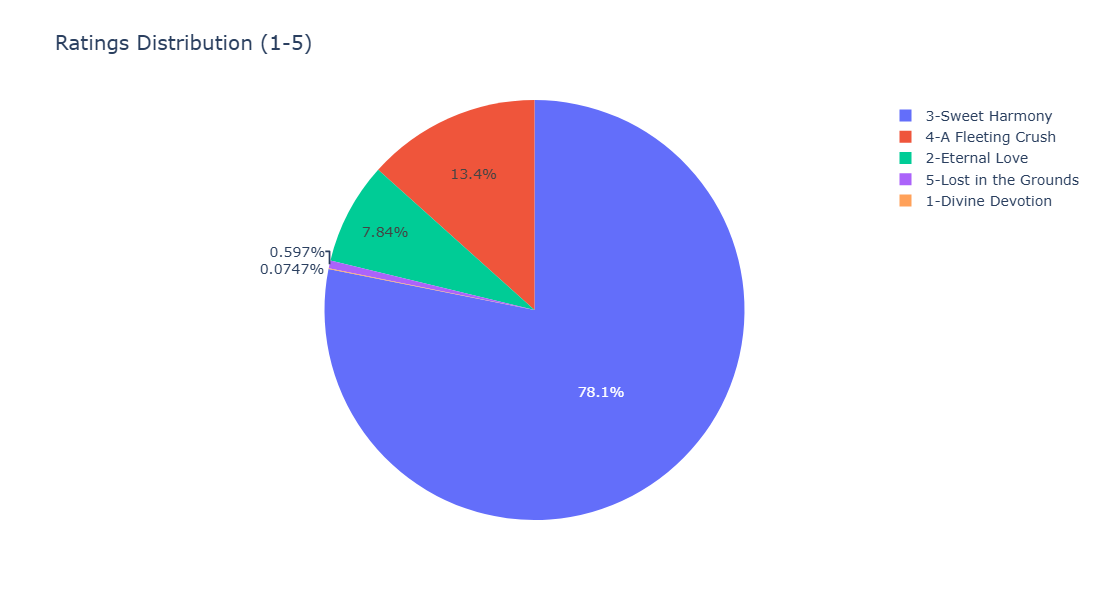

In [288]:
# Assuming df_coffee contains the 'Rating' column
rating_counts = df_coffee['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Ensure the ratings are sorted in ascending order
rating_counts = rating_counts.sort_values(by='Rating')

# Create a pie chart
rating_pie = px.pie(
    rating_counts,
    names='Rating',
    values='Count',
    title='Ratings Distribution (1-5)'
)

# Update layout to increase size
rating_pie.update_layout(
    width=800,  # Increase width
    height=600,  # Increase height
    font=dict(size=14)  # Adjust font size for better readability
)

# Show the chart
rating_pie.show()


|Range | Rating |
|------|----------------|
| 90+ | 1-Divine Devotion |
| 85 - 89 | 2-Eternal Love |
|80 - 84| 3-Sweet Harmony |   
| 70 - 79| 4-A Fleeting Crush|
|70-| 5-Lost in the Grounds |

In [289]:
# Ensure the column is in datetime format
df_coffee['Grading_Date'] = pd.to_datetime(df_coffee['Grading_Date'], errors='coerce')

# Extract the year
df_coffee['Grading_Year'] = df_coffee['Grading_Date'].dt.year

# Display the updated dataframe with the new column
print(df_coffee[['Grading_Date', 'Grading_Year']].head())


  Grading_Date  Grading_Year
0   2015-04-04          2015
1   2015-04-04          2015
2   2010-05-31          2010
3   2015-03-26          2015
4   2015-04-04          2015


In [293]:
diff = df_coffee['Expiration_year'] - df_coffee['Harvest_Year']

In [294]:
diff.value_counts()

1    915
2    317
0     99
3      8
Name: count, dtype: int64

In [292]:
# Ensure the column is in datetime format
df_coffee['Expiration'] = pd.to_datetime(df_coffee['Expiration'], errors='coerce')

# Extract the year
df_coffee['Expiration_year'] = df_coffee['Expiration'].dt.year

# Display the updated dataframe with the new column
print(df_coffee[['Expiration', 'Expiration_year']].head())


  Expiration  Expiration_year
0 2016-04-03             2016
1 2016-04-03             2016
2 2011-05-31             2011
3 2016-03-25             2016
4 2016-04-03             2016


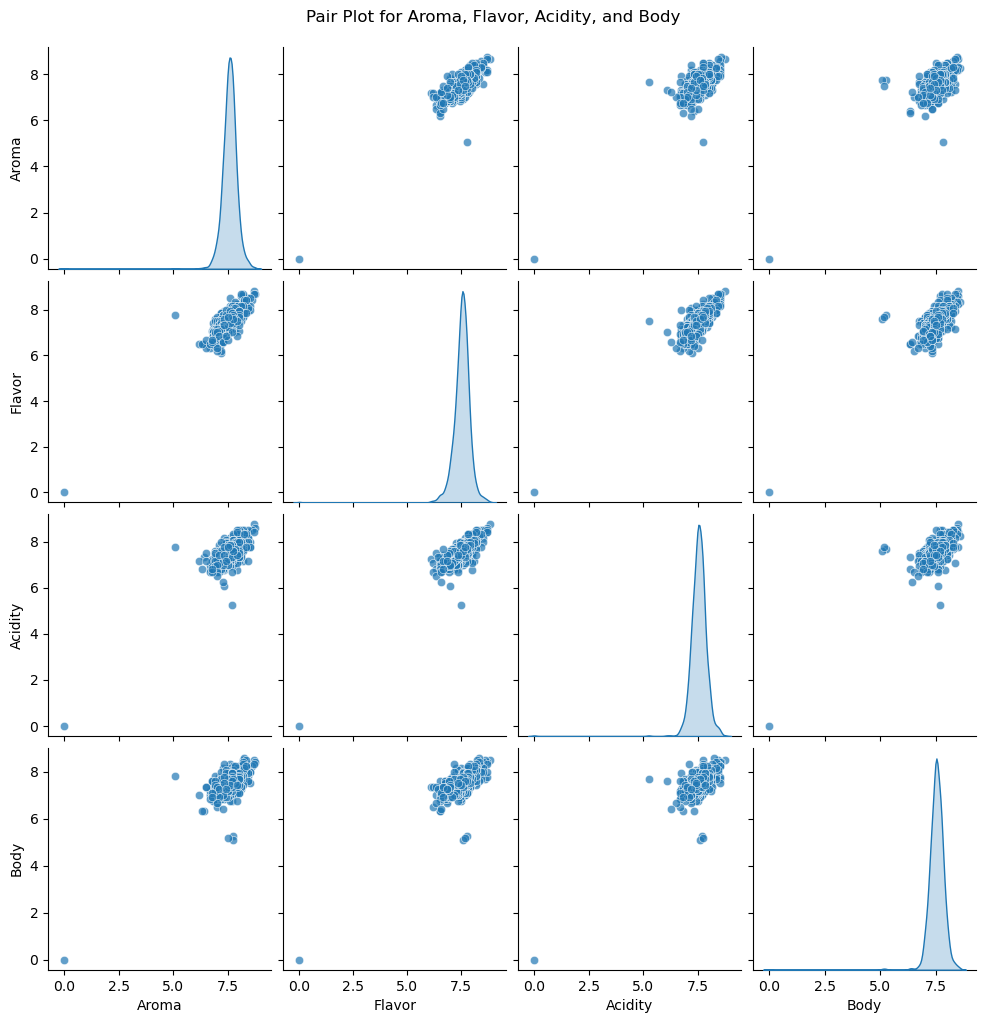

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_coffee is the dataset containing Aroma, Flavor, Acidity, and Body columns
features = ['Aroma', 'Flavor', 'Acidity', 'Body']

# Pairplot
sns.pairplot(df_coffee[features], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot for Aroma, Flavor, Acidity, and Body', y=1.02)
plt.show()




In [316]:
df_coffee[df_coffee['In_Country_Partner']=="Specialty Coffee Association"]


,Species,Owner,Origin_Country,Farm_Name,Mill,Company,Region,Producer,Number_of_Bags,Bag_Weight_kg,...,Category2_Defects,Expiration,Certification,Altitude(Meters),Total_Production,Validity_Days,Rating,Grading_Year,Expiration_year,Altitude_Range
2,Arabica,Grounds For Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",Unknown,Unknown,Unknown,Unknown,5,1.000,...,0,2011-05-31,Specialty Coffee Association,1700.00000,5.000,365,2-Eternal Love,2010,2011,Medium
13,Arabica,Grounds For Health Admin,United States (Hawaii),Arianna Farms,Unknown,Unknown,Kona,"Robert, Sharon, Arianna Wood",1,1.000,...,2,2011-05-31,Specialty Coffee Association,185.80608,1.000,365,2-Eternal Love,2010,2011,Low
16,Arabica,Grounds For Health Admin,Indonesia,Toarco Jaya,Unknown,Unknown,Sulawesi,P.T. Toarco Jaya,1,2.000,...,0,2011-05-31,Specialty Coffee Association,1500.00000,2.000,365,2-Eternal Love,2010,2011,Medium
21,Arabica,The Coffee Source Inc.,Costa Rica,Several,Cafe Altura De San Ramon,The Coffee Source Inc.,San Ramon,Several,250,1.361,...,2,2015-04-02,Specialty Coffee Association,1300.00000,340.250,365,2-Eternal Love,2014,2015,Medium
29,Arabica,"Lin, Che-Hao Krude 林哲豪",Taiwan,Tsoustructive Garden 鄒築園,Tsoustructive Garden 鄒築園,Taiwan Coffee Laboratory,"Leye, Alishan Township, Chiayi County","Fang,Zheng-Lun 方政倫",20,50.000,...,0,2017-05-18,Specialty Coffee Association,1200.00000,1000.000,365,2-Eternal Love,2016,2017,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,Luis Robles,Ecuador,Robustasa,Our Own Lab,Robustasa,"San Juan, Playas",Café Robusta Del Ecuador S.A.,1,2.000,...,1,2017-01-18,Specialty Coffee Association,1300.00000,2.000,365,4-A Fleeting Crush,2016,2017,Medium
1335,Robusta,Luis Robles,Ecuador,Robustasa,Own Laboratory,Robustasa,"San Juan, Playas",Café Robusta Del Ecuador S.A.,1,2.000,...,0,2017-01-18,Specialty Coffee Association,40.00000,2.000,365,4-A Fleeting Crush,2016,2017,Low
1336,Robusta,James Moore,United States,Fazenda Cazengo,Cafe Cazengo,Global Opportunity Fund,"Kwanza Norte Province, Angola",Cafe Cazengo,1,1.000,...,6,2015-12-23,Specialty Coffee Association,795.00000,1.000,365,4-A Fleeting Crush,2014,2015,Low
1337,Robusta,Cafe Politico,India,Unknown,Unknown,Cafe Politico,Unknown,Unknown,1,2.268,...,1,2015-08-25,Specialty Coffee Association,1300.00000,2.268,365,4-A Fleeting Crush,2014,2015,Medium



# Enhancing Coffee Quality and Marketability

## Overview
This document outlines key insights and strategies to improve coffee quality, increase total cup points, and enhance marketability. By focusing on cultivation, processing, and certification, businesses can position themselves in the premium coffee market.

## 1. Dominance of Arabica Coffee
**Arabica** is the most preferred coffee species due to its **smooth flavor, balanced acidity, and aromatic complexity**. Focusing on Arabica can help tap into the premium coffee segment.

### **Actionable Steps:**
- Invest in **high-altitude farming** for better bean quality.
- Improve **cultivation techniques** to enhance consistency and yield.

## 2. Importance of Washed/Wet Processing
The **washed (wet) processing method** is widely recognized for producing **cleaner and brighter** coffee flavors. It helps in removing defective beans and enhances clarity in taste.

### **Actionable Steps:**
- Optimize **fermentation and water usage** to maintain quality.
- Train farmers in **best wet-processing practices** to ensure consistency.

## 3. Collaboration with Specialty Coffee Organizations
Partnering with organizations like the **Specialty Coffee Association (SCA)** provides access to **quality certification, research, and premium markets**.

### **Actionable Steps:**
- Obtain **SCA certification** to validate quality and attract buyers.
- Engage in **training programs and competitions** to benchmark against top producers.

## 4. Managing Seed Moisture Content
Lower **moisture content** ensures **longer shelf life, prevents mold, and maintains bean integrity**.

### **Actionable Steps:**
- Maintain **optimal drying conditions** (10-12% moisture content).
- Use **solar or mechanical drying** methods for consistency.

## 5. Extending Coffee Validity for Better Marketability
Currently, coffee validity is **around one year**. Extending its shelf life can improve **market reach and reduce wastage**.

### **Actionable Steps:**
- Implement **vacuum packaging or nitrogen flushing** for longer freshness.
- Use **temperature and humidity-controlled storage** to prevent degradation.

## 6. Achieving Higher Cup Points (90+)
Currently, **there is no production with 90+ cup points**. Higher cup scores create **exclusive and premium products** in high demand.

### **Actionable Steps:**
- Improve **farming techniques, processing methods, and roasting precision**.
- Experiment with **new processing methods** (e.g., anaerobic fermentation) to enhance flavors.

## 7. High-Quality Coffee (80+ Cup Points) Appeals to Discerning Consumers
Coffee scoring **above 80+** is considered **specialty-grade**, attracting **premium buyers willing to pay more**.

### **Actionable Steps:**
- Implement strict **quality control in harvesting, processing, and roasting**.
- Train farmers and processors to **identify and remove defects** for better bean quality.

## Final Recommendations
To improve total cup points and market success, businesses should:
✅ Enhance **cultivation and processing methods**.
✅ Collaborate with **specialty coffee organizations**.
✅ Innovate in **storage and shelf-life extension**.
✅ Target **premium markets with high-quality coffee**.

By implementing these strategies, businesses can **increase coffee quy, reach specialty markets, and maximize profitability**. 🚀☕

